### Programmer Name  : Mr. Tan Choon How @ Jordan
### TP Number        : TP061594
### Program Name     : BSC (HONS) IN COMPUTER SCIENCE WITH A SPECIALISM IN DATA ANALYTICS

# Import library

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, classification_report, r2_score
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Import dataset

In [273]:
# Read csv file
df = pd.read_csv('C:/Users/jorda/OneDrive - Asia Pacific University/Desktop/FYP_Y3S2/submission/TAN_CHOON_HOW_MR_TP061594_FYP_Source_Code_APD3F2209_CSDA/Framingham_Heart_Disease_Dataset.csv')

# Exploratory Data Analysis

In [274]:
# Display the first 5 rows
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [275]:
# Check the number of rows and columns
df.shape

(4240, 16)

In [276]:
# Check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [277]:
# Check the number of missing values for each columns
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [278]:
# Summary of the feature variables
df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp']].describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000


In [279]:
# Summary of the feature variables
df[['diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']].describe()


,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [280]:
# Check the correlation between the target variable and some of the other variables in the dataset
corr_matrix = df.corr()
corr_matrix["TenYearCHD"].sort_values(ascending=False)

TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
heartRate          0.022907
currentSmoker      0.019448
education         -0.054248
Name: TenYearCHD, dtype: float64

#### Data Visualisation

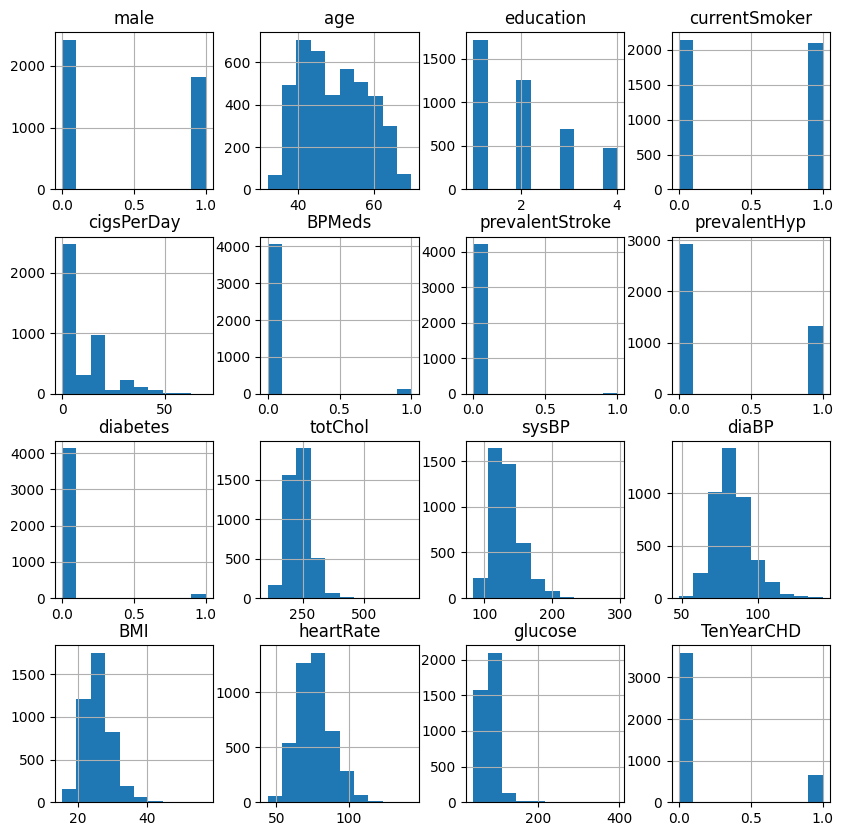

In [281]:
# Plot histograms of all numerical features
df.hist(figsize=(10,10))
plt.show()

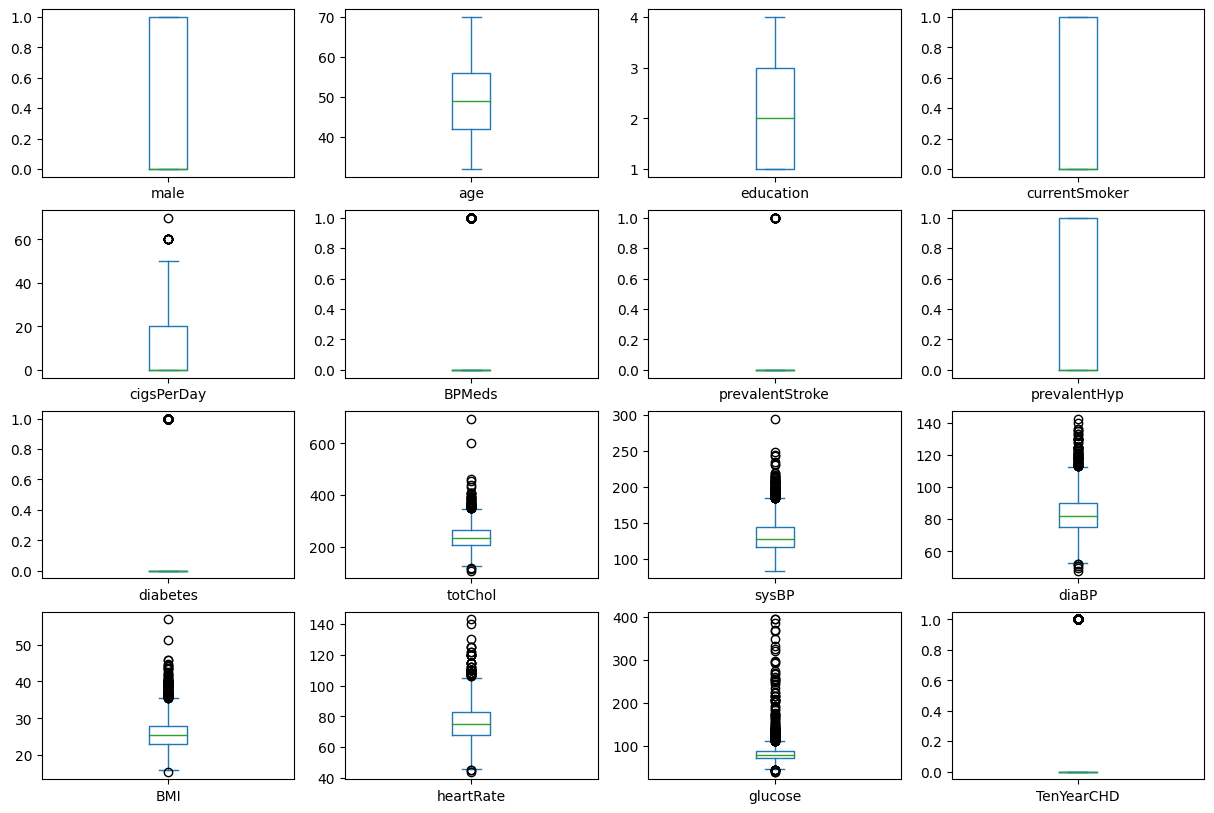

In [282]:
# Plot box plots of all numerical features
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

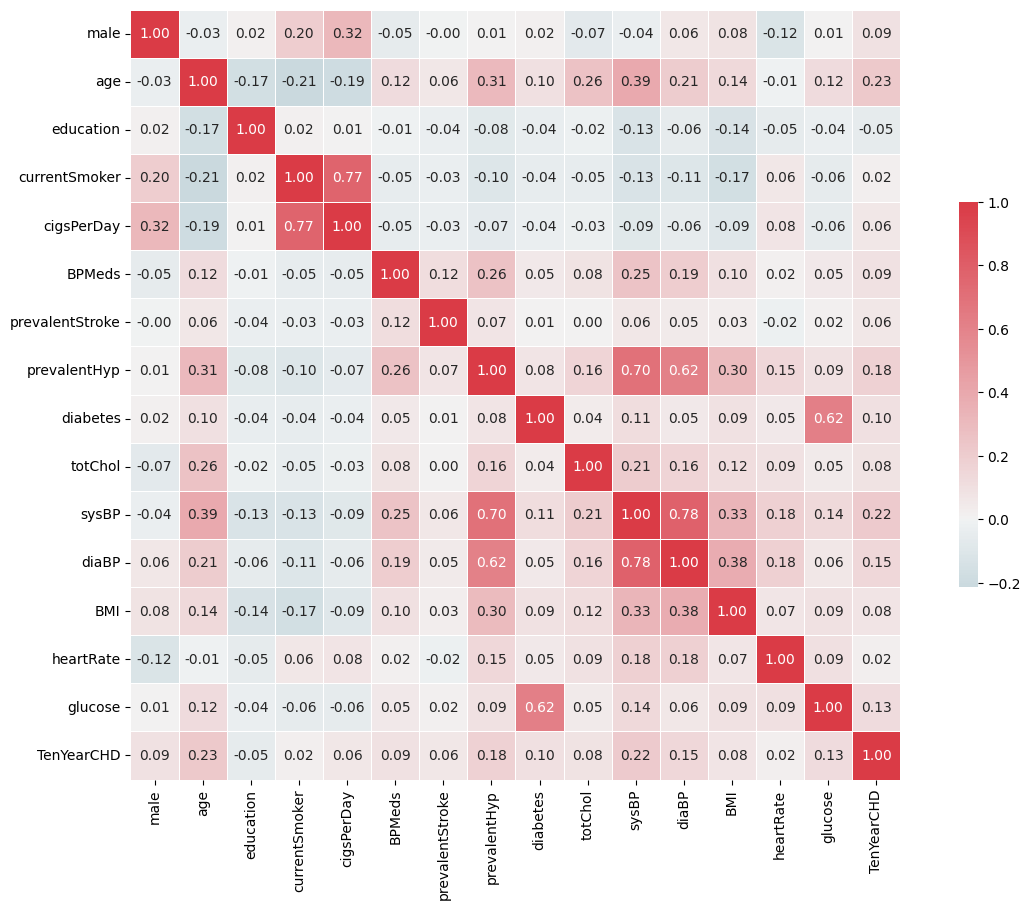

In [283]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


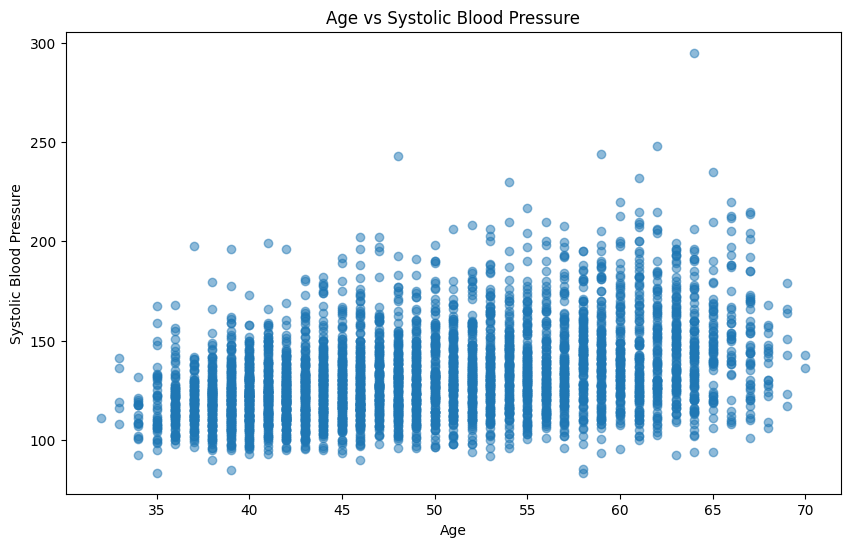

In [284]:
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the scatter plot
plt.scatter(x=df['age'], y=df['sysBP'], alpha=0.5)

# Add title and axis labels
plt.title('Age vs Systolic Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')

# Show the plot
plt.show()


<Axes: >

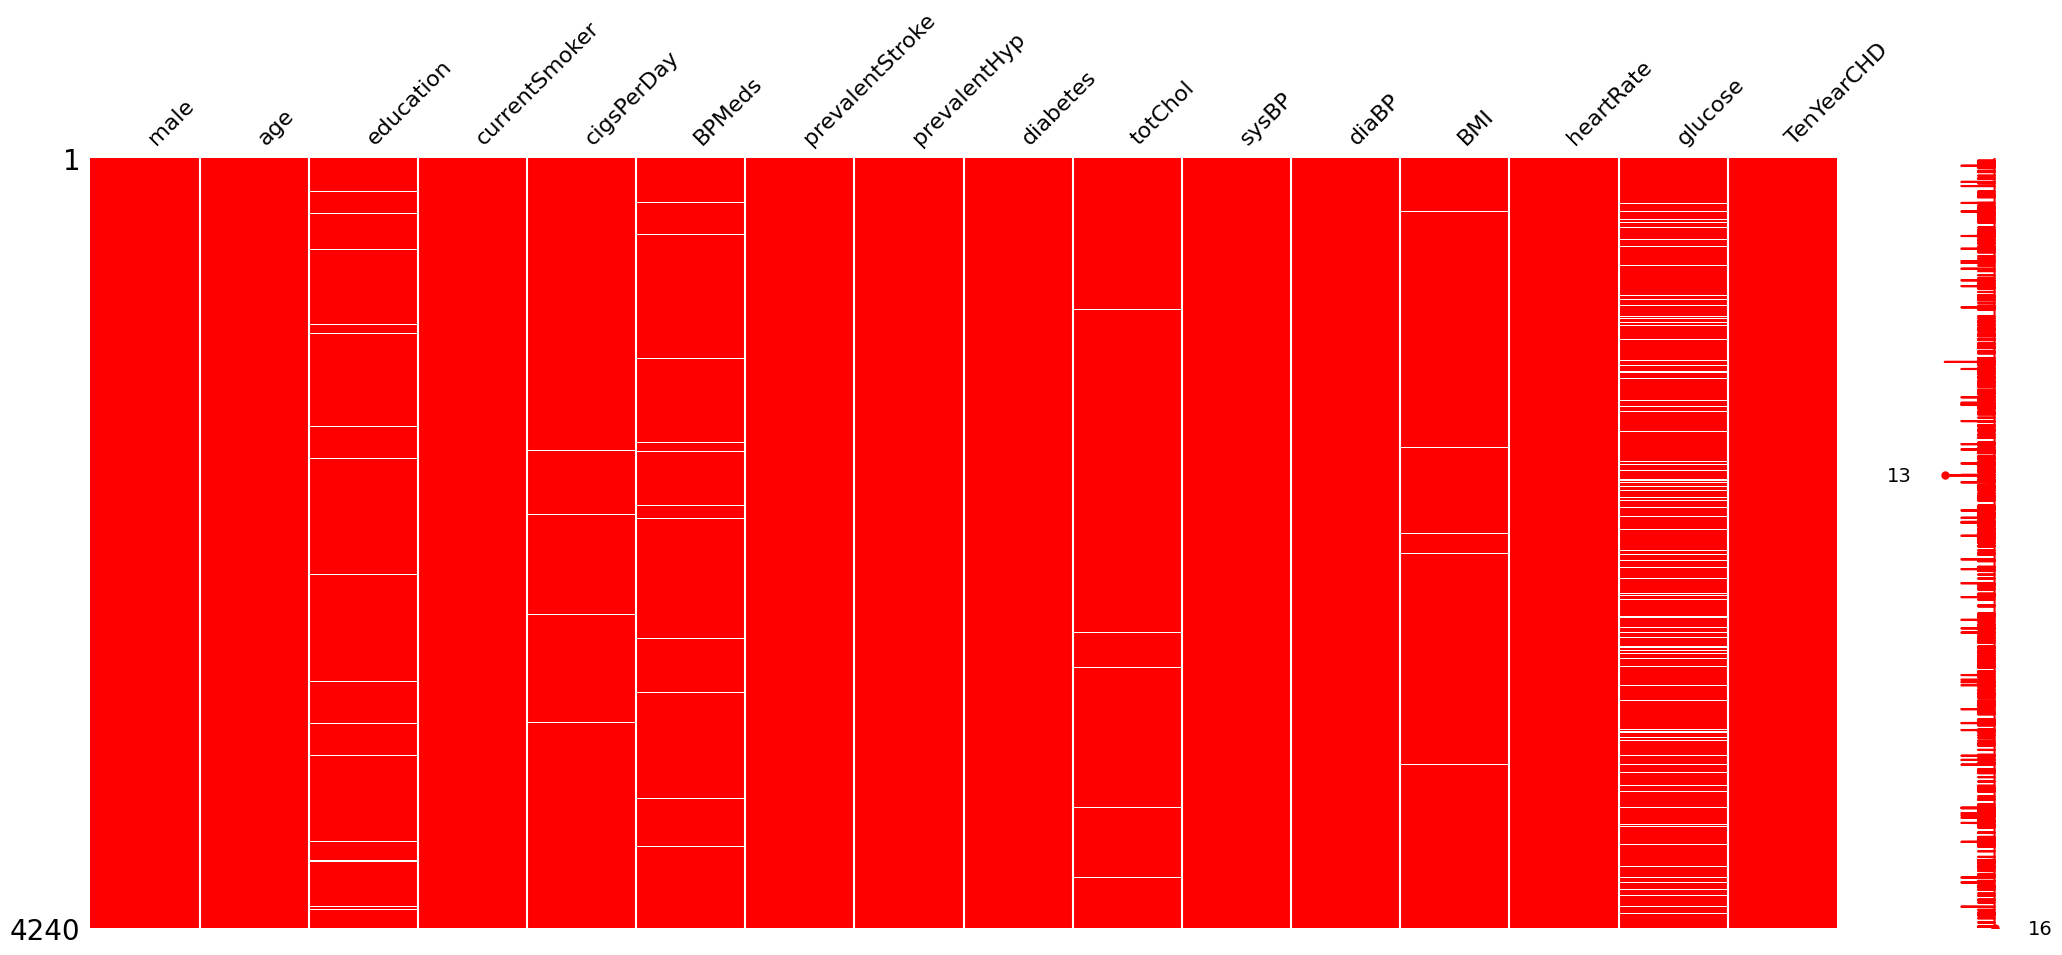

In [285]:
# Display the missing data patterns using missingno matrix plot with red color
msno.matrix(df, color=(1,0,0))

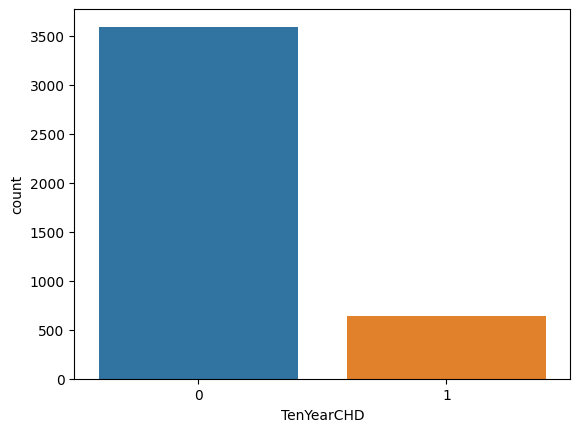

In [286]:
# Display the distribution of the target variable
sns.countplot(x="TenYearCHD", data=df)
plt.show()

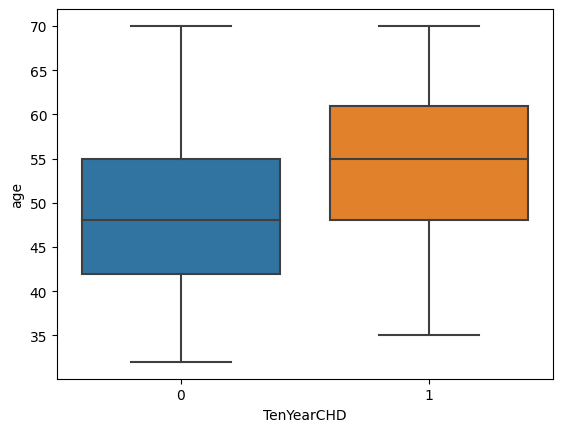

In [287]:
sns.boxplot(x="TenYearCHD", y="age", data=df)
plt.show()

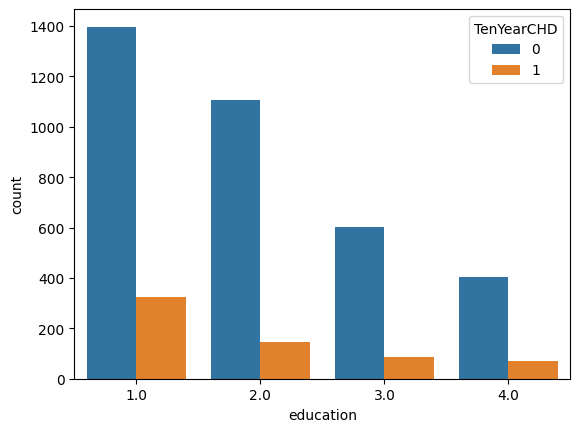

In [288]:
sns.countplot(x="education", hue="TenYearCHD", data=df)
plt.show()

# Pre-processing

### Data cleaning

##### *Changing column names*

In [289]:
# Define a dictionary of new column names
new_column_names = {'male': 'is_male',
                    'age': 'age_yrs',
                    'education': 'education_yrs',
                    'currentSmoker': 'is_smoker',
                    'cigsPerDay': 'cigsPerDay',
                    'BPMeds': 'is_on_bp_meds',
                    'prevalentStroke': 'has_history_of_stroke',
                    'prevalentHyp': 'has_hypertension',
                    'diabetes': 'has_diabetes',
                    'totChol': 'tot_chol',
                    'sysBP': 'systolic_blood_pressure',
                    'diaBP': 'diastolic_blood_pressure',
                    'BMI': 'BMI',
                    'heartRate': 'heart_rate_bpm',
                    'glucose': 'glucose',
                    'TenYearCHD': 'TenYearCHD'}

# Rename the columns using the dictionary
df = df.rename(columns=new_column_names)

# Print the column names
print(df.columns)

Index(['is_male', 'age_yrs', 'education_yrs', 'is_smoker', 'cigsPerDay',
       'is_on_bp_meds', 'has_history_of_stroke', 'has_hypertension',
       'has_diabetes', 'tot_chol', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'BMI', 'heart_rate_bpm', 'glucose',
       'TenYearCHD'],
      dtype='object')


##### *Handling missing values*

In [290]:
print('Number of missing values before imputation:')
df.isnull().sum()

Number of missing values before imputation:


is_male                       0
age_yrs                       0
education_yrs               105
is_smoker                     0
cigsPerDay                   29
is_on_bp_meds                53
has_history_of_stroke         0
has_hypertension              0
has_diabetes                  0
tot_chol                     50
systolic_blood_pressure       0
diastolic_blood_pressure      0
BMI                          19
heart_rate_bpm                1
glucose                     388
TenYearCHD                    0
dtype: int64

##### *KNN imputation*

In [291]:
# Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()

# Impute missing values using KNN imputer
imputer = KNNImputer(n_neighbors=7)
df[missing_cols] = imputer.fit_transform(df[missing_cols])
print('Number of missing values after imputation:')
df.isnull().sum()

Number of missing values after imputation:


is_male                     0
age_yrs                     0
education_yrs               0
is_smoker                   0
cigsPerDay                  0
is_on_bp_meds               0
has_history_of_stroke       0
has_hypertension            0
has_diabetes                0
tot_chol                    0
systolic_blood_pressure     0
diastolic_blood_pressure    0
BMI                         0
heart_rate_bpm              0
glucose                     0
TenYearCHD                  0
dtype: int64

In [292]:
df.head(10)

,is_male,age_yrs,education_yrs,is_smoker,cigsPerDay,is_on_bp_meds,has_history_of_stroke,has_hypertension,has_diabetes,tot_chol,systolic_blood_pressure,diastolic_blood_pressure,BMI,heart_rate_bpm,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


##### *Changing column format*


In [293]:
# convert columns to integer data type
df["education_yrs"] = df["education_yrs"].astype(np.int64)
df["cigsPerDay"] = df["cigsPerDay"].astype(np.int64)
df["is_on_bp_meds"] = df["is_on_bp_meds"].astype(np.int64)
df["tot_chol"] = df["tot_chol"].astype(np.int64)
df["systolic_blood_pressure"] = df["systolic_blood_pressure"].astype(np.int64)
df["diastolic_blood_pressure"] = df["diastolic_blood_pressure"].astype(np.int64)
df["heart_rate_bpm"] = df["heart_rate_bpm"].astype(np.int64)
df["glucose"] = df["glucose"].astype(np.int64)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   is_male                   4240 non-null   int64  
 1   age_yrs                   4240 non-null   int64  
 2   education_yrs             4240 non-null   int64  
 3   is_smoker                 4240 non-null   int64  
 4   cigsPerDay                4240 non-null   int64  
 5   is_on_bp_meds             4240 non-null   int64  
 6   has_history_of_stroke     4240 non-null   int64  
 7   has_hypertension          4240 non-null   int64  
 8   has_diabetes              4240 non-null   int64  
 9   tot_chol                  4240 non-null   int64  
 10  systolic_blood_pressure   4240 non-null   int64  
 11  diastolic_blood_pressure  4240 non-null   int64  
 12  BMI                       4240 non-null   float64
 13  heart_rate_bpm            4240 non-null   int64  
 14  glucose 

##### *Handling outliers*

In [295]:
# Split the dataset into training and testing sets
X_train_outliers, X_test_outliers, y_train_outliers, y_test_outliers = train_test_split(df.drop('TenYearCHD', axis=1), df['TenYearCHD'], test_size=0.2, random_state=42)

# Train a logistic regression model on the original dataset
model_orig = LogisticRegression(random_state=42).fit(X_train_outliers, y_train_outliers)
pred_orig = model_orig.predict(X_test_outliers)
acc_orig = accuracy_score(y_test_outliers, pred_orig)

# Train a logistic regression model on the outlier-removed dataset
df_no_outliers = df[(df['systolic_blood_pressure'] < 200) & (df['diastolic_blood_pressure'] < 120) & (df['BMI'] < 50)]
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(df_no_outliers.drop('TenYearCHD', axis=1), df_no_outliers['TenYearCHD'], test_size=0.2, random_state=42)
model_no_outliers = LogisticRegression(random_state=42).fit(X_train_no_outliers, y_train_no_outliers)
pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)
acc_no_outliers = accuracy_score(y_test_no_outliers, pred_no_outliers)

print('Accuracy on original dataset:', acc_orig)
print('Accuracy on outlier-removed dataset:', acc_no_outliers)

Accuracy on original dataset: 0.8596698113207547
Accuracy on outlier-removed dataset: 0.8421052631578947


c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

### Data transformation

#### *Feature engeenering*

##### *Target variable separation*

In [296]:
X = df.drop("TenYearCHD", axis=1)
y = df["TenYearCHD"]

##### *One Hot Encoding*

In [239]:
education_dummies = pd.get_dummies(X['education_yrs'], prefix='education_yrs')
X = X.drop('education_yrs', axis=1)
X = pd.concat([X, education_dummies], axis=1)


##### *Normalisation - Scaling*

In [ ]:
scaler = StandardScaler()
continuous_vars = ['age_yrs', 'cigsPerDay', 'tot_chol', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'BMI', 'heart_rate_bpm', 'glucose']
X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

##### *Sampling - SMOTE*

In [240]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

##### *Splitting into train and test set*

In [244]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Base Model building

Libraries

In [181]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, log_loss,
                             precision_score, recall_score, roc_auc_score,
                             roc_curve)
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [298]:
# create an instance of the classifier
rfc = RandomForestClassifier()

# fit the model on the training data
rfc.fit(X_train, y_train)

# make predictions on the test data
y_pred_rfc = rfc.predict(X_test)

# calculate evaluation metrics
RFC_accuracy = accuracy_score(y_test, y_pred_rfc)
RFC_precision = precision_score(y_test, y_pred_rfc)
RFC_recall = recall_score(y_test, y_pred_rfc)
RFC_f1 = f1_score(y_test, y_pred_rfc)
RFC_auc = roc_auc_score(y_test, y_pred_rfc)

# print the evaluation metrics
print("RFC_Accuracy:", RFC_accuracy)
print("RFC_Precision:", RFC_precision)
print("RFC_Recall:", RFC_recall)
print("RFC_F1 score:", RFC_f1)
print("RFC_AUC:", RFC_auc)


RFC_Accuracy: 0.8883225208526413
RFC_Precision: 0.8788706739526412
RFC_Recall: 0.8993476234855545
RFC_F1 score: 0.8889912482726854
RFC_AUC: 0.8883834891621321


#### Based Model 1: RandomForestClassifier

In [193]:
# create an instance of the classifier
rfc = RandomForestClassifier()

# fit the model on the training data
rfc.fit(X_train, y_train)

# make predictions on the test data
y_pred_rfc = rfc.predict(X_test)

# calculate evaluation metrics
RFC_accuracy = accuracy_score(y_test, y_pred_rfc)
RFC_precision = precision_score(y_test, y_pred_rfc)
RFC_recall = recall_score(y_test, y_pred_rfc)
RFC_f1 = f1_score(y_test, y_pred_rfc)
RFC_auc = roc_auc_score(y_test, y_pred_rfc)

# print the evaluation metrics
print("RFC_Accuracy:", RFC_accuracy)
print("RFC_Precision:", RFC_precision)
print("RFC_Recall:", RFC_recall)
print("RFC_F1 score:", RFC_f1)
print("RFC_AUC:", RFC_auc)


RFC_Accuracy: 0.8985406532314107
RFC_Precision: 0.8881491344873502
RFC_Recall: 0.9149519890260631
RFC_F1 score: 0.9013513513513514
RFC_AUC: 0.8983210649355667


#### Based Model 2: MLP Classifier

In [155]:
# Instantiate an MLPClassifier object with default hyperparameters
mlp_model = MLPClassifier()

# Fit the MLPClassifier model on the training data
mlp_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Calculate evaluation metrics
MLP_accuracy = accuracy_score(y_test, y_pred_mlp)
MLP_precision = precision_score(y_test, y_pred_mlp)
MLP_recall = recall_score(y_test, y_pred_mlp)
MLP_f1 = f1_score(y_test, y_pred_mlp)
MLP_auc = roc_auc_score(y_test, y_pred_mlp)


# Print the evaluation metrics
print("MLP_Accuracy:", MLP_accuracy)
print("MLP_Precision:", MLP_precision)
print("MLP_Recall:", MLP_recall)
print("MLP_F1 score:", MLP_f1)
print("MLP_AUC:", MLP_auc)

MLP_Accuracy: 0.8332175121612231
MLP_Precision: 0.8204456094364351
MLP_Recall: 0.8587105624142661
MLP_F1 score: 0.8391420911528151
MLP_AUC: 0.8328764079676965


c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Based Model 3: Support Vector Machines (SVMs)

In [156]:
# Instantiate a Support Vector Machine object with default hyperparameters
svm_model = SVC()

# Fit the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
SVM_precision = precision_score(y_test, y_pred_svm)
SVM_recall = recall_score(y_test, y_pred_svm)
SVM_f1 = f1_score(y_test, y_pred_svm)
SVM_auc = roc_auc_score(y_test, y_pred_svm)


# Print evaluation metrics
print("SVM_Accuracy:", SVM_accuracy)
print("SVM_Precision:", SVM_precision)
print("SVM_Recall:", SVM_recall)
print("SVM_F1 score:", SVM_f1)
print("SVM_AUC:", SVM_auc)



SVM_Accuracy: 0.7310632383599722
SVM_Precision: 0.725
SVM_Recall: 0.7558299039780522
SVM_F1 score: 0.7400940228341168
SVM_AUC: 0.7307318533974768


#### Based Model 4: Logistic Regression

In [157]:
# Instantiate a LogisticRegression object
lr_model = LogisticRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
LR_accuracy = accuracy_score(y_test, y_pred_lr)
LR_precision = precision_score(y_test, y_pred_lr)
LR_recall = recall_score(y_test, y_pred_lr)
LR_f1 = f1_score(y_test, y_pred_lr)
LR_auc = roc_auc_score(y_test, y_pred_lr)

# Print evaluation metrics
print("LR_Accuracy:", LR_accuracy)
print("LR_Precision:", LR_precision)
print("LR_Recall:", LR_recall)
print("LR_F1 score:", LR_f1)
print("LR_AUC:", LR_auc)


LR_Accuracy: 0.6789437109103544
LR_Precision: 0.6856745479833102
LR_Recall: 0.6762688614540466
LR_F1 score: 0.680939226519337
LR_AUC: 0.6789795011495585


#### Base Model Comparison

In [194]:
# create a dictionary of evaluation metrics for each model
results_dict = {
    "RFC": [RFC_accuracy, RFC_precision, RFC_recall, RFC_f1, RFC_auc],
    "MLP": [MLP_accuracy, MLP_precision, MLP_recall, MLP_f1, MLP_auc],
    "SVM": [SVM_accuracy, SVM_precision, SVM_recall, SVM_f1, SVM_auc],
    "LR": [LR_accuracy, LR_accuracy, LR_recall, LR_f1, LR_auc]
}

# create a pandas dataframe from the results dictionary
based_results_df = pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "Recall", "F1 score", "AUC"])

# print the results dataframe
print(based_results_df)


     Accuracy  Precision    Recall  F1 score       AUC
RFC  0.898541   0.888149  0.914952  0.901351  0.898321
MLP  0.833218   0.820446  0.858711  0.839142  0.832876
SVM  0.731063   0.725000  0.755830  0.740094  0.730732
LR   0.678944   0.678944  0.676269  0.680939  0.678980


# Base Model Optimisation

#### Optimised Based Model 1: RandomForestClassifier

In [159]:
# create an instance of the classifier
rfc = RandomForestClassifier()

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# create an instance of the GridSearchCV class for Random Forest Classifier
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5)

# fit the model on the training data
rfc_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
rfc_best_params = rfc_grid_search.best_params_

# make predictions on the test data using the optimized model
y_pred_rfc_optimized = rfc_grid_search.predict(X_test)

# calculate evaluation metrics
RFC_optimized_accuracy = accuracy_score(y_test, y_pred_rfc_optimized)
RFC_optimized_precision = precision_score(y_test, y_pred_rfc_optimized)
RFC_optimized_recall = recall_score(y_test, y_pred_rfc_optimized)
RFC_optimized_f1 = f1_score(y_test, y_pred_rfc_optimized)
RFC_optimized_auc = roc_auc_score(y_test, y_pred_rfc_optimized)

# Print the best hyperparameters and the corresponding mean test score
print("Best parameters:", rfc_best_params)

# print the evaluation metrics
print("RFC_Optimized_Accuracy:", RFC_optimized_accuracy)
print("RFC_Optimized_Precision:", RFC_optimized_precision)
print("RFC_Optimized_Recall:", RFC_optimized_recall)
print("RFC_Optimized_F1 score:", RFC_optimized_f1)
print("RFC_Optimized_AUC:", RFC_optimized_auc)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
RFC_Optimized_Accuracy: 0.901320361362057
RFC_Optimized_Precision: 0.8908122503328895
RFC_Optimized_Recall: 0.9176954732510288
RFC_Optimized_F1 score: 0.9040540540540541
RFC_Optimized_AUC: 0.901101257752275


#### Optimised Based Model 2: MLPClassifier

In [160]:
# Create an instance of the MLPClassifier
mlp = MLPClassifier()

# Define the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10,10), (50,50), (100,100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create an instance of the GridSearchCV class for MLPClassifier
mlp_grid_search = GridSearchCV(mlp, param_grid, cv=5)

# Fit the model on the training data
mlp_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
mlp_best_params = mlp_grid_search.best_params_

# Make predictions on the test data using the optimized model
y_pred_mlp_optimized = mlp_grid_search.predict(X_test)

# Calculate evaluation metrics
MLP_accuracy_optimized = accuracy_score(y_test, y_pred_mlp_optimized)
MLP_precision_optimized = precision_score(y_test, y_pred_mlp_optimized)
MLP_recall_optimized = recall_score(y_test, y_pred_mlp_optimized)
MLP_f1_optimized = f1_score(y_test, y_pred_mlp_optimized)
MLP_auc_optimized = roc_auc_score(y_test, y_pred_mlp_optimized)

# Print the best hyperparameters and the corresponding mean test score
print("Best parameters:", mlp_best_params)

# Print the evaluation metrics
print("MLP_Optimized_Accuracy:", MLP_accuracy_optimized)
print("MLP_Optimized_Precision:", MLP_precision_optimized)
print("MLP_Optimized_Recall:", MLP_recall_optimized)
print("MLP_Optimized_F1 score:", MLP_f1_optimized)
print("MLP_Optimized_AUC:", MLP_auc_optimized)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

Best parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
MLP_Optimized_Accuracy: 0.876997915218902
MLP_Optimized_Precision: 0.8365853658536585
MLP_Optimized_Recall: 0.9410150891632373
MLP_Optimized_F1 score: 0.8857327307940606
MLP_Optimized_AUC: 0.8761413473985201


c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Optimised Based Model 3: Support Vector Machines (SVMs)

In [161]:
# Instantiate a Support Vector Machine object
svm_model = SVC()

# Define a dictionary of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Instantiate a GridSearchCV object
svm_grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
svm_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
svm_best_params = svm_grid_search.best_params_

# Make predictions on the test data using the optimized model
y_pred_svm_optimized = svm_grid_search.predict(X_test)

# Calculate evaluation metrics
SVM_accuracy_optimized = accuracy_score(y_test, y_pred_svm_optimized)
SVM_precision_optimized = precision_score(y_test, y_pred_svm_optimized)
SVM_recall_optimized = recall_score(y_test, y_pred_svm_optimized)
SVM_f1_optimized = f1_score(y_test, y_pred_svm_optimized)
SVM_auc_optimized = roc_auc_score(y_test, y_pred_svm_optimized)

# Print the best hyperparameters
print("Best parameters:", svm_best_params)

# Print evaluation metrics with optimized hyperparameters
print("SVM_Optimized_Accuracy:", SVM_accuracy_optimized)
print("SVM_Optimized_Precision:", SVM_precision_optimized)
print("SVM_Optimized_Recall:", SVM_recall_optimized)
print("SVM_Optimized_F1 score:", SVM_f1_optimized)
print("SVM_Optimized_AUC:", SVM_auc_optimized)

Best parameters: {'C': 100, 'kernel': 'rbf'}
SVM_Optimized_Accuracy: 0.8735232800555942
SVM_Optimized_Precision: 0.8307134220072552
SVM_Optimized_Recall: 0.9423868312757202
SVM_Optimized_F1 score: 0.8830334190231364
SVM_Optimized_AUC: 0.8726018663420855


#### Optimised Based Model 4: Logistic Regression

In [162]:
# create an instance of the classifier
lr = LogisticRegression()

# define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# create an instance of the GridSearchCV class for Logistic Regression
lr_grid_search = GridSearchCV(lr, param_grid, cv=5)

# fit the model on the training data
lr_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
lr_best_params = lr_grid_search.best_params_

# make predictions on the test data using the optimized model
y_pred_lr_optimized = lr_grid_search.predict(X_test)

# calculate evaluation metrics
LR_optimized_accuracy = accuracy_score(y_test, y_pred_lr_optimized)
LR_optimized_precision = precision_score(y_test, y_pred_lr_optimized)
LR_optimized_recall = recall_score(y_test, y_pred_lr_optimized)
LR_optimized_f1 = f1_score(y_test, y_pred_lr_optimized)
LR_optimized_auc = roc_auc_score(y_test, y_pred_lr_optimized)

# Print the best hyperparameters and the corresponding mean test score
print("Best parameters:", lr_best_params)

# print the evaluation metrics
print("LR_Optimized_Accuracy:", LR_optimized_accuracy)
print("LR_Optimized_Precision:", LR_optimized_precision)
print("LR_Optimized_Recall:", LR_optimized_recall)
print("LR_Optimized_F1 score:", LR_optimized_f1)
print("LR_Optimized_AUC:", LR_optimized_auc)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
LR_Optimized_Accuracy: 0.674774148714385
LR_Optimized_Precision: 0.6780354706684857
LR_Optimized_Recall: 0.6817558299039781
LR_Optimized_F1 score: 0.679890560875513
LR_Optimized_AUC: 0.6746807318533976


#### Optimised Base Model Comparison

In [163]:
# create a dictionary of evaluation metrics for each model
results_dict = {
    "RFC_Optimized": [RFC_optimized_accuracy, RFC_optimized_precision, RFC_optimized_recall, RFC_optimized_f1, RFC_optimized_auc],
    "MLP_Optimized": [MLP_accuracy_optimized, MLP_precision_optimized, MLP_recall_optimized, MLP_f1_optimized, MLP_auc_optimized],
    "SVM_Optimized": [SVM_accuracy_optimized, SVM_precision_optimized, SVM_recall_optimized, SVM_f1_optimized, SVM_auc_optimized],
    "LR_Optimized": [LR_optimized_accuracy, LR_optimized_precision, LR_optimized_recall, LR_optimized_f1, LR_optimized_auc]
}

# create a pandas dataframe from the results dictionary
optimized_results_df = pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "Recall", "F1 score", "AUC"])

# print the results dataframe
print(optimized_results_df)


               Accuracy  Precision    Recall  F1 score       AUC
RFC_Optimized  0.901320   0.890812  0.917695  0.904054  0.901101
MLP_Optimized  0.876998   0.836585  0.941015  0.885733  0.876141
SVM_Optimized  0.873523   0.830713  0.942387  0.883033  0.872602
LR_Optimized   0.674774   0.678035  0.681756  0.679891  0.674681


# Hybrid Model building

#### Hybrid Model 1: RandomForestClassifier & MLPClassifier

In [231]:
# Create the base models
rf = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
mlp = MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate='adaptive', solver='lbfgs')

# Create the stacking model
RFC_MLP_estimators = [('rf', rf), ('mlp', mlp)]
RFC_MLP_stacking_model = StackingClassifier(estimators=RFC_MLP_estimators, final_estimator=LogisticRegression())

# Train the stacking model
RFC_MLP_stacking_model.fit(X_train, y_train)

# Make predictions on the test set
RFC_MLP_y_pred = RFC_MLP_stacking_model.predict(X_test)

# calculate evaluation metrics
RFC_MLP_accuracy = accuracy_score(y_test, RFC_MLP_y_pred)
RFC_MLP_precision = precision_score(y_test, RFC_MLP_y_pred)
RFC_MLP_recall = recall_score(y_test, RFC_MLP_y_pred)
RFC_MLP_f1 = f1_score(y_test, RFC_MLP_y_pred)
RFC_MLP_auc = roc_auc_score(y_test, RFC_MLP_y_pred)

# Print the results
print("RFC_MLP_Accuracy:", RFC_MLP_accuracy)
print("RFC_MLP_Precision:", RFC_MLP_precision)
print("RFC_MLPL_Recall:", RFC_MLP_recall)
print("RFC_MLP_F1 score:", RFC_MLP_f1)
print("RFC_MLP_AUC:", RFC_MLP_auc)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

RFC_MLP_Accuracy: 0.9131341209173037
RFC_MLP_Precision: 0.9081081081081082
RFC_MLPL_Recall: 0.9218106995884774
RFC_MLP_F1 score: 0.9149081007488087
RFC_MLP_AUC: 0.9130180258505768


#### Hybrid Model 2: RandomForestClassifier & Support Vector Machines (SVM)

In [165]:
# Create the base models
rf = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
svc = SVC(kernel='rbf', C=100, probability=True)

# Create the stacking model
RFC_SVM_estimators = [('rf', rf), ('svc', svc)]
RFC_SVM_stacking_model = StackingClassifier(estimators=RFC_SVM_estimators, final_estimator=LogisticRegression())

# Train the stacking model
RFC_SVM_stacking_model.fit(X_train, y_train)

# Make predictions on the test set
RFC_SVM_y_pred = RFC_SVM_stacking_model.predict(X_test)

# Calculate evaluation metrics
RFC_SVM_accuracy = accuracy_score(y_test, RFC_SVM_y_pred)
RFC_SVM_precision = precision_score(y_test, RFC_SVM_y_pred)
RFC_SVM_recall = recall_score(y_test, RFC_SVM_y_pred)
RFC_SVM_f1 = f1_score(y_test, RFC_SVM_y_pred)
RFC_SVM_auc = roc_auc_score(y_test, RFC_SVM_y_pred)

# Print the results
print("RFC_SVM_Accuracy:", RFC_SVM_accuracy)
print("RFC_SVM_Precision:", RFC_SVM_precision)
print("RFC_SVM_Recall:", RFC_SVM_recall)
print("RFC_SVM_F1 score:", RFC_SVM_f1)
print("RFC_SVM_AUC:", RFC_SVM_auc)


RFC_SVM_Accuracy: 0.9152189020152884
RFC_SVM_Precision: 0.9163237311385459
RFC_SVM_Recall: 0.9163237311385459
RFC_SVM_F1 score: 0.9163237311385459
RFC_SVM_AUC: 0.9152041190903997


#### Hybrid Model 3: Random Forest Classifier & Logistic Regression

In [166]:
# Create the base models
rf = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
lr = LogisticRegression(C=0.01, penalty='l2', solver='saga')

# Create the stacking model
RFC_LR_estimators = [('rf', rf), ('lr', lr)]
RFC_LR_stacking_model = StackingClassifier(estimators=RFC_LR_estimators, final_estimator=lr)

# Train the stacking model
RFC_LR_stacking_model.fit(X_train, y_train)

# Make predictions on the test set
RFC_LR_y_pred = RFC_LR_stacking_model.predict(X_test)

# Calculate evaluation metrics
RFC_LR_accuracy = accuracy_score(y_test, RFC_LR_y_pred)
RFC_LR_precision = precision_score(y_test, RFC_LR_y_pred)
RFC_LR_recall = recall_score(y_test, RFC_LR_y_pred)
RFC_LR_f1 = f1_score(y_test, RFC_LR_y_pred)
RFC_LR_auc = roc_auc_score(y_test, RFC_LR_y_pred)

# Print the results
print("RFC_LR_Accuracy:", RFC_LR_accuracy)
print("RFC_LR_Precision:", RFC_LR_precision)
print("RFC_LR_Recall:", RFC_LR_recall)
print("RFC_LR_F1 score:", RFC_LR_f1)
print("RFC_LR_AUC:", RFC_LR_auc)

RFC_LR_Accuracy: 0.896455872133426
RFC_LR_Precision: 0.8950953678474114
RFC_LR_Recall: 0.9012345679012346
RFC_LR_F1 score: 0.8981544771018456
RFC_LR_AUC: 0.8963919318379413


#### Hybrid Model 4: MLP Classifier & Support Vector Machines (SVM)

In [167]:
# Create the base models
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
svc = SVC(kernel='rbf', C=100, probability=True)

# Create the stacking model
MLP_SVM_estimators = [('mlp', mlp), ('svc', svc)]
MLP_SVM_stacking_model = StackingClassifier(estimators=MLP_SVM_estimators, final_estimator=SVC())

# Train the stacking model
MLP_SVM_stacking_model.fit(X_train, y_train)

# Make predictions on the test set
MLP_SVM_y_pred = MLP_SVM_stacking_model.predict(X_test)

# Calculate evaluation metrics
MLP_SVM_accuracy = accuracy_score(y_test, MLP_SVM_y_pred)
MLP_SVM_precision = precision_score(y_test, MLP_SVM_y_pred)
MLP_SVM_recall = recall_score(y_test, MLP_SVM_y_pred)
MLP_SVM_f1 = f1_score(y_test, MLP_SVM_y_pred)
MLP_SVM_auc = roc_auc_score(y_test, MLP_SVM_y_pred)

# Print the results
print("MLP_SVM_Accuracy:", MLP_SVM_accuracy)
print("MLP_SVM_Precision:", MLP_SVM_precision)
print("MLP_SVM_Recall:", MLP_SVM_recall)
print("MLP_SVM_F1 score:", MLP_SVM_f1)
print("MLP_SVM_AUC:", MLP_SVM_auc)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

MLP_SVM_Accuracy: 0.881862404447533
MLP_SVM_Precision: 0.8663171690694627
MLP_SVM_Recall: 0.906721536351166
MLP_SVM_F1 score: 0.886058981233244
MLP_SVM_AUC: 0.88152978226009


#### Hybrid Model 5: MLP Classifier & Logistic Regression

In [168]:
# Create the base models
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='tanh', solver='lbfgs', alpha=0.1, learning_rate='adaptive')
lr = LogisticRegression(C=0.01, penalty='l2', solver='saga')

# Create the stacking model
MLP_LR_estimators = [('mlp', mlp), ('lr', lr)]
MLP_LR_stacking_model = StackingClassifier(estimators=MLP_LR_estimators, final_estimator=lr)

# Train the stacking model
MLP_LR_stacking_model.fit(X_train, y_train)

# Make predictions on the test set
MLP_LR_y_pred = MLP_LR_stacking_model.predict(X_test)

# Calculate evaluation metrics
MLP_LR_accuracy = accuracy_score(y_test, MLP_LR_y_pred)
MLP_LR_precision = precision_score(y_test, MLP_LR_y_pred)
MLP_LR_recall = recall_score(y_test, MLP_LR_y_pred)
MLP_LR_f1 = f1_score(y_test, MLP_LR_y_pred)
MLP_LR_auc = roc_auc_score(y_test, MLP_LR_y_pred)

# Print the results
print("MLP_LR_Accuracy:", MLP_LR_accuracy)
print("MLP_LR_Precision:", MLP_LR_precision)
print("MLP_LR_Recall:", MLP_LR_recall)
print("MLP_LR_F1 score:", MLP_LR_f1)
print("MLP_LR_AUC:", MLP_LR_auc)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

MLP_LR_Accuracy: 0.8776928422515636
MLP_LR_Precision: 0.8392638036809816
MLP_LR_Recall: 0.9382716049382716
MLP_LR_F1 score: 0.8860103626943006
MLP_LR_AUC: 0.8768822813423752


c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Hybrid Model 6: Support Vector Machines & Logistic Regression

In [169]:
# Create the base models
svc = SVC(C=100, kernel='rbf')
lr = LogisticRegression(C=0.01, penalty='l2', solver='saga')

# Create the stacking model
SVM_LR_estimators = [('svc', svc), ('lr', lr)]
SVM_LR_stacking_model = StackingClassifier(estimators=SVM_LR_estimators, final_estimator=lr)

# Train the stacking model
SVM_LR_stacking_model.fit(X_train, y_train)

# Make predictions on the test set
SVM_LR_y_pred = SVM_LR_stacking_model.predict(X_test)

# Calculate evaluation metrics
SVM_LR_accuracy = accuracy_score(y_test, SVM_LR_y_pred)
SVM_LR_precision = precision_score(y_test, SVM_LR_y_pred)
SVM_LR_recall = recall_score(y_test, SVM_LR_y_pred)
SVM_LR_f1 = f1_score(y_test, SVM_LR_y_pred)
SVM_LR_auc = roc_auc_score(y_test, SVM_LR_y_pred)

# Print the results
print("SVM_LR_Accuracy:", SVM_LR_accuracy)
print("SVM_LR_Precision:", SVM_LR_precision)
print("SVM_LR_Recall:", SVM_LR_recall)
print("SVM_LR_F1 score:", SVM_LR_f1)
print("SVM_LR_AUC:", SVM_LR_auc)


SVM_LR_Accuracy: 0.8776928422515636
SVM_LR_Precision: 0.8434782608695652
SVM_LR_Recall: 0.9314128943758574
SVM_LR_F1 score: 0.8852672750977836
SVM_LR_AUC: 0.8769740528217315


#### Hybrid Model Comparison embedded with best parameter from base model

In [232]:
# create a dictionary of evaluation metrics for each model
results_dict = {
    "RFC_MLP": [RFC_MLP_accuracy, RFC_MLP_precision, RFC_MLP_recall, RFC_MLP_f1, RFC_MLP_auc],
    "RFC_LR": [RFC_LR_accuracy, RFC_LR_precision, RFC_LR_recall, RFC_LR_f1, RFC_LR_auc],
    "RFC_SVM": [RFC_SVM_accuracy, RFC_SVM_precision, RFC_SVM_recall, RFC_SVM_f1, RFC_SVM_auc],
    "MLP_LR": [MLP_LR_accuracy, MLP_LR_precision, MLP_LR_recall, MLP_LR_f1, MLP_LR_auc],
    "MLP_SVM": [MLP_SVM_accuracy, MLP_SVM_precision, MLP_SVM_recall, MLP_SVM_f1, MLP_SVM_auc],
    "SVM_LR": [SVM_LR_accuracy, SVM_LR_precision, SVM_LR_recall, SVM_LR_f1, SVM_LR_auc]
}

# create a pandas dataframe from the results dictionary
optimized_results_df = pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "Recall", "F1 score", "AUC"])

# print the results dataframe
print(optimized_results_df)

         Accuracy  Precision    Recall  F1 score       AUC
RFC_MLP  0.913134   0.908108  0.921811  0.914908  0.913018
RFC_LR   0.896456   0.895095  0.901235  0.898154  0.896392
RFC_SVM  0.909659   0.906377  0.916324  0.911323  0.909570
MLP_LR   0.877693   0.839264  0.938272  0.886010  0.876882
MLP_SVM  0.881862   0.866317  0.906722  0.886059  0.881530
SVM_LR   0.877693   0.843478  0.931413  0.885267  0.876974


# Hybrid Model building with hyperparameter tuning

#### Tuned Hybrid Model 1: RandomForestClassifier & MLPClassifier

In [331]:
# Create the base models
rf = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
mlp = MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate='adaptive', solver='lbfgs')

# Create the stacking model
RFC_MLP_estimators = [('rf', rf), ('mlp', mlp)]
RFC_MLP_stacking_model = StackingClassifier(estimators=RFC_MLP_estimators, final_estimator=LogisticRegression())

# Define the hyperparameters to tune
param_grid = {
    'final_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'final_estimator__C': [0.1, 1, 10],
}

# Use GridSearchCV to find the best hyperparameters for the final estimator
RFC_MLP_optimized_grid_search = GridSearchCV(RFC_MLP_stacking_model, param_grid=param_grid, cv=5)
RFC_MLP_optimized_grid_search.fit(X_train, y_train)

# Get the best model
RFC_MLP_optimized_best_model = RFC_MLP_optimized_grid_search.best_estimator_

# Use the best model to make predictions on the test set
RFC_MLP_optimized_y_pred = RFC_MLP_optimized_best_model.predict(X_test)

# Calculate evaluation metrics
RFC_MLP_optimized_accuracy = accuracy_score(y_test, RFC_MLP_optimized_y_pred)
RFC_MLP_optimized_precision = precision_score(y_test, RFC_MLP_optimized_y_pred)
RFC_MLP_optimized_recall = recall_score(y_test, RFC_MLP_optimized_y_pred)
RFC_MLP_optimized_f1 = f1_score(y_test, RFC_MLP_optimized_y_pred)
RFC_MLP_optimized_auc = roc_auc_score(y_test, RFC_MLP_optimized_y_pred)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

Best parameters: StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=500)),
                               ('mlp',
                                MLPClassifier(activation='tanh', alpha=0.1,
                                              hidden_layer_sizes=(100, 100),
                                              learning_rate='adaptive',
                                              solver='lbfgs'))],
                   final_estimator=LogisticRegression(C=1))
RFC_MLP_Accuracy: 0.9138290479499652
RFC_MLP_Precision: 0.9071332436069987
RFC_MLPL_Recall: 0.9245541838134431
RFC_MLP_F1 score: 0.9157608695652175
RFC_MLP_AUC: 0.9136855426109469
RFC_MLP_Log Loss: 0.20364387442018758
Confusion Matrix:
[[641  69]
 [ 55 674]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       710
           1       0.91      0.92    

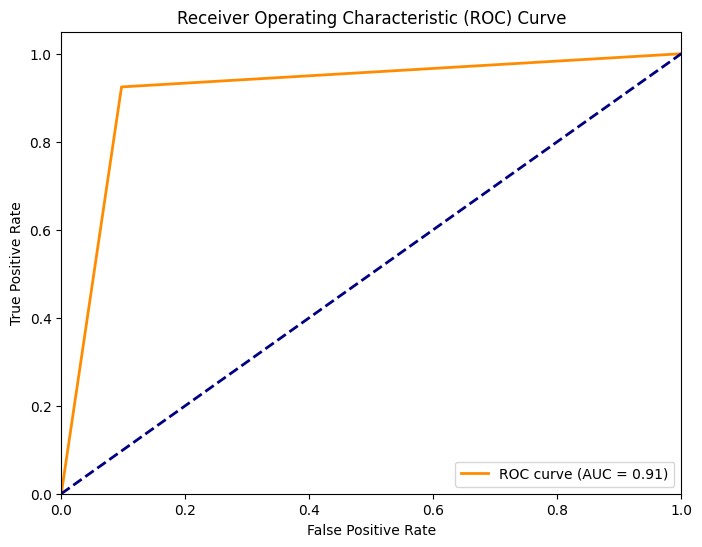

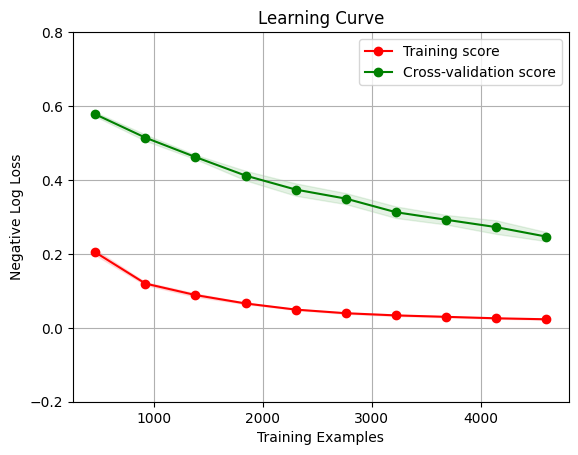

In [196]:
# Print the best parameter values
print("Best parameters:", RFC_MLP_optimized_grid_search.best_estimator_)

# Print the results
print("RFC_MLP_Accuracy:", RFC_MLP_optimized_accuracy)
print("RFC_MLP_Precision:", RFC_MLP_optimized_precision)
print("RFC_MLPL_Recall:", RFC_MLP_optimized_recall)
print("RFC_MLP_F1 score:", RFC_MLP_optimized_f1)
print("RFC_MLP_AUC:", RFC_MLP_optimized_auc)

## LOG LOSS
RFC_MLP_optimized_y_pred_prob = RFC_MLP_optimized_best_model.predict_proba(X_test)
RFC_MLP_optimized_log_loss = log_loss(y_test, RFC_MLP_optimized_y_pred_prob)
print("RFC_MLP_Log Loss:", RFC_MLP_optimized_log_loss)


## CONFUSION MATRIX
# Use the best model to make predictions on the test set
RFC_MLP_optimized_y_pred = RFC_MLP_optimized_best_model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, RFC_MLP_optimized_y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


## CLASSIFICATION REPORT
# Use the best model to make predictions on the test set
RFC_MLP_optimized_y_pred = RFC_MLP_optimized_best_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, RFC_MLP_optimized_y_pred))


## ROC GRAPH
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, RFC_MLP_optimized_y_pred)
# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=RFC_MLP_optimized_best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

train_log_loss_mean = -np.mean(train_scores, axis=1)
train_log_loss_std = np.std(train_scores, axis=1)
test_log_loss_mean = -np.mean(test_scores, axis=1)
test_log_loss_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Negative Log Loss')
plt.ylim(-0.2, 0.8)
plt.grid()
plt.fill_between(train_sizes, train_log_loss_mean - train_log_loss_std,
                 train_log_loss_mean + train_log_loss_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_log_loss_mean - test_log_loss_std,
                 test_log_loss_mean + test_log_loss_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_log_loss_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_log_loss_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#### Tuned Hybrid Model 2: RandomForestClassifier & Support Vector Machines (SVM)

In [198]:
# Create the base models
rf = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
svm = SVC(C=100, kernel='rbf')

# Create the stacking model
RFC_SVM_estimators = [('rf', rf), ('svm', svm)]
RFC_SVM_stacking_model = StackingClassifier(estimators=RFC_SVM_estimators, final_estimator=LogisticRegression())

# Define the hyperparameters to tune
param_grid = {
    'final_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'final_estimator__C': [0.1, 1, 10],
}

# Use GridSearchCV to find the best hyperparameters for the final estimator
RFC_SVM_optimized_grid_search = GridSearchCV(RFC_SVM_stacking_model, param_grid=param_grid, cv=5)
RFC_SVM_optimized_grid_search.fit(X_train, y_train)

# Get the best model
RFC_SVM_optimized_best_model = RFC_SVM_optimized_grid_search.best_estimator_

# Use the best model to make predictions on the test set
RFC_SVM_optimized_y_pred = RFC_SVM_optimized_best_model.predict(X_test)

# Calculate evaluation metrics
RFC_SVM_optimized_accuracy = accuracy_score(y_test, RFC_SVM_optimized_y_pred)
RFC_SVM_optimized_precision = precision_score(y_test, RFC_SVM_optimized_y_pred)
RFC_SVM_optimized_recall = recall_score(y_test, RFC_SVM_optimized_y_pred)
RFC_SVM_optimized_f1 = f1_score(y_test, RFC_SVM_optimized_y_pred)
RFC_SVM_optimized_auc = roc_auc_score(y_test, RFC_SVM_optimized_y_pred)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_stacking.py", line 660, in fit
    return super().fit(X, y_encoded, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users

Best parameters: StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=500)),
                               ('svm', SVC(C=100))],
                   final_estimator=LogisticRegression(C=1))
RFC_SVM_Accuracy: 0.9075747046560111
RFC_SVM_Precision: 0.907103825136612
RFC_SVM_Recall: 0.9108367626886146
RFC_SVM_F1 score: 0.9089664613278576
RFC_SVM_AUC: 0.9075310574006453
RFC_SVM_Log Loss: 0.22539276467213692
Confusion Matrix:
[[642  68]
 [ 65 664]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       710
           1       0.91      0.91      0.91       729

    accuracy                           0.91      1439
   macro avg       0.91      0.91      0.91      1439
weighted avg       0.91      0.91      0.91      1439



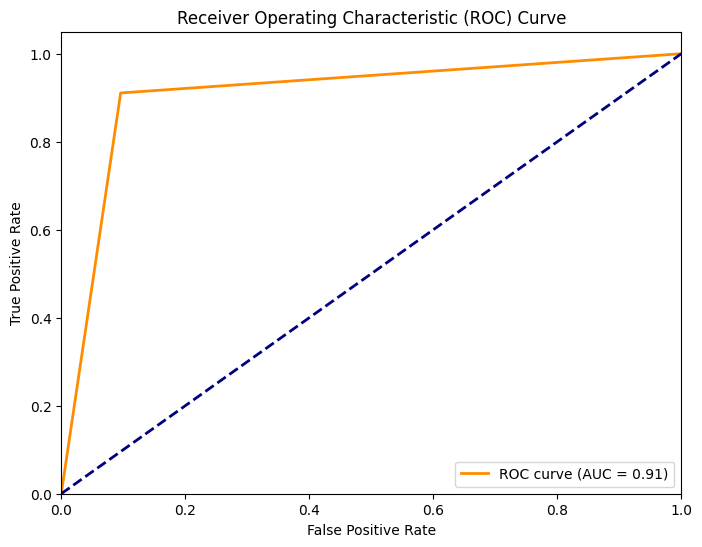

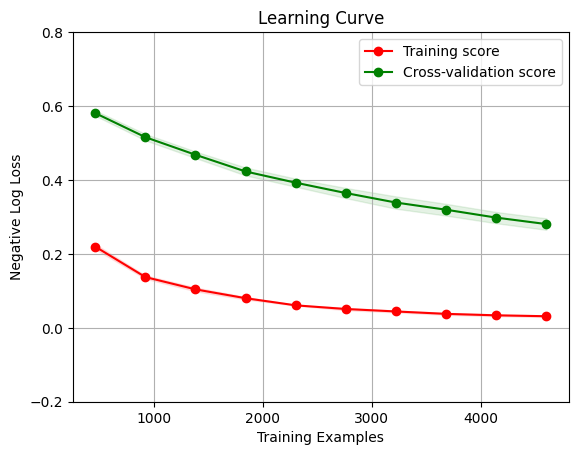

In [199]:
# Print the best parameter values
print("Best parameters:", RFC_SVM_optimized_grid_search.best_estimator_)

# Print the results
print("RFC_SVM_Accuracy:", RFC_SVM_optimized_accuracy)
print("RFC_SVM_Precision:", RFC_SVM_optimized_precision)
print("RFC_SVM_Recall:", RFC_SVM_optimized_recall)
print("RFC_SVM_F1 score:", RFC_SVM_optimized_f1)
print("RFC_SVM_AUC:", RFC_SVM_optimized_auc)


## LOG LOSS
RFC_SVM_optimized_y_pred_prob = RFC_SVM_optimized_best_model.predict_proba(X_test)
RFC_SVM_optimized_log_loss = log_loss(y_test, RFC_SVM_optimized_y_pred_prob)
print("RFC_SVM_Log Loss:", RFC_SVM_optimized_log_loss)


## CONFUSION MATRIX
# Use the best model to make predictions on the test set
RFC_SVM_optimized_y_pred = RFC_SVM_optimized_best_model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, RFC_SVM_optimized_y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


## CLASSIFICATION REPORT
# Use the best model to make predictions on the test set
RFC_SVM_optimized_y_pred = RFC_SVM_optimized_best_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, RFC_SVM_optimized_y_pred))


## ROC GRAPH
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, RFC_SVM_optimized_y_pred)
# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=RFC_SVM_optimized_best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

train_log_loss_mean = -np.mean(train_scores, axis=1)
train_log_loss_std = np.std(train_scores, axis=1)
test_log_loss_mean = -np.mean(test_scores, axis=1)
test_log_loss_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Negative Log Loss')
plt.ylim(-0.2, 0.8)
plt.grid()
plt.fill_between(train_sizes, train_log_loss_mean - train_log_loss_std,
                 train_log_loss_mean + train_log_loss_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_log_loss_mean - test_log_loss_std,
                 test_log_loss_mean + test_log_loss_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_log_loss_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_log_loss_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#### Tuned Hybrid Model 3: Random Forest Classifier & Logistic Regression

In [234]:
# Create the base models
rf = RandomForestClassifier(max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
lr = LogisticRegression(C=0.01, penalty='l2', solver='saga')

# Create the stacking model
RFC_LR_estimators = [('rf', rf), ('lr', lr)]
RFC_LR_stacking_model = StackingClassifier(estimators=RFC_LR_estimators, final_estimator=LogisticRegression())

# Define the hyperparameters to tune
param_grid = {
    'final_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'final_estimator__C': [0.1, 1, 10],
}

# Use GridSearchCV to find the best hyperparameters for the final estimator
RFC_LR_optimized_grid_search = GridSearchCV(RFC_LR_stacking_model, param_grid=param_grid, cv=5)
RFC_LR_optimized_grid_search.fit(X_train, y_train)

# Get the best model
RFC_LR_optimized_best_model = RFC_LR_optimized_grid_search.best_estimator_

# Use the best model to make predictions on the test set
RFC_LR_optimized_y_pred = RFC_LR_optimized_best_model.predict(X_test)

# Calculate evaluation metrics
RFC_LR_optimized_accuracy = accuracy_score(y_test, RFC_LR_optimized_y_pred)
RFC_LR_optimized_precision = precision_score(y_test, RFC_LR_optimized_y_pred)
RFC_LR_optimized_recall = recall_score(y_test, RFC_LR_optimized_y_pred)
RFC_LR_optimized_f1 = f1_score(y_test, RFC_LR_optimized_y_pred)
RFC_LR_optimized_auc = roc_auc_score(y_test, RFC_LR_optimized_y_pred)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_stacking.py", line 660, in fit
    return super().fit(X, y_encoded, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users

Best parameters: StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_features='log2',
                                                       n_estimators=500)),
                               ('lr',
                                LogisticRegression(C=0.01, solver='saga'))],
                   final_estimator=LogisticRegression(C=10))
RFC_LR_Accuracy: 0.9152189020152884
RFC_LR_Precision: 0.9256661991584852
RFC_LR_Recall: 0.9053497942386831
RFC_LR_F1 score: 0.9153952843273232
RFC_LR_AUC: 0.9153509534573697
RFC_LR_Log Loss: 0.19745589787556608
Confusion Matrix:
[[657  53]
 [ 69 660]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       710
           1       0.93      0.91      0.92       729

    accuracy                           0.92      1439
   macro avg       0.92      0.92      0.92      1439
weighted avg       0.92      0.92      0.92      1439



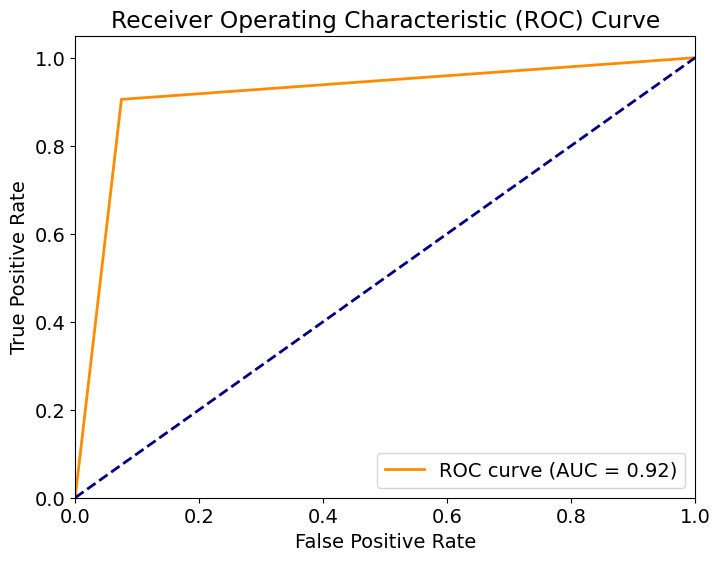

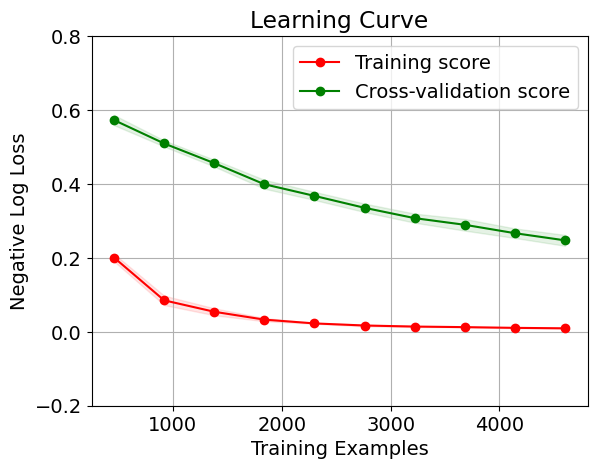

In [235]:
# Print the best parameter values
print("Best parameters:", RFC_LR_optimized_grid_search.best_estimator_)

# Print the results
print("RFC_LR_Accuracy:", RFC_LR_optimized_accuracy)
print("RFC_LR_Precision:", RFC_LR_optimized_precision)
print("RFC_LR_Recall:", RFC_LR_optimized_recall)
print("RFC_LR_F1 score:", RFC_LR_optimized_f1)
print("RFC_LR_AUC:", RFC_LR_optimized_auc)


## LOG LOSS
RFC_LR_optimized_y_pred_prob = RFC_LR_optimized_best_model.predict_proba(X_test)
RFC_LR_optimized_log_loss = log_loss(y_test, RFC_LR_optimized_y_pred_prob)
print("RFC_LR_Log Loss:", RFC_LR_optimized_log_loss)


## CONFUSION MATRIX
# Use the best model to make predictions on the test set
RFC_LR_optimized_y_pred = RFC_LR_optimized_best_model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, RFC_LR_optimized_y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


## CLASSIFICATION REPORT
# Use the best model to make predictions on the test set
RFC_LR_optimized_y_pred = RFC_LR_optimized_best_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, RFC_LR_optimized_y_pred))


## ROC GRAPH
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, RFC_LR_optimized_y_pred)
# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=RFC_LR_optimized_best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

train_log_loss_mean = -np.mean(train_scores, axis=1)
train_log_loss_std = np.std(train_scores, axis=1)
test_log_loss_mean = -np.mean(test_scores, axis=1)
test_log_loss_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Negative Log Loss')
plt.ylim(-0.2, 0.8)
plt.grid()
plt.fill_between(train_sizes, train_log_loss_mean - train_log_loss_std,
                 train_log_loss_mean + train_log_loss_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_log_loss_mean - test_log_loss_std,
                 test_log_loss_mean + test_log_loss_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_log_loss_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_log_loss_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#### Tuned Hybrid Model 4: MLP Classifier & Support Vector Machines (SVM)

In [202]:
# Import required libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define the base models
mlp = MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate='adaptive', solver='lbfgs')
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

# Create the stacking model
MLP_SVM_estimators = [('mlp', mlp), ('svm', svm)]
MLP_SVM_stacking_model = StackingClassifier(estimators=MLP_SVM_estimators, final_estimator=LogisticRegression())

# Define the hyperparameters to tune
param_grid = {
    'final_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'final_estimator__C': [0.1, 1, 10],
}

# Use GridSearchCV to find the best hyperparameters for the final estimator
MLP_SVM_optimized_grid_search = GridSearchCV(MLP_SVM_stacking_model, param_grid=param_grid, cv=5)
MLP_SVM_optimized_grid_search.fit(X_train, y_train)

# Get the best model
MLP_SVM_optimized_best_model = MLP_SVM_optimized_grid_search.best_estimator_

# Use the best model to make predictions on the test set
MLP_SVM_optimized_y_pred = MLP_SVM_optimized_best_model.predict(X_test)

# Calculate evaluation metrics
MLP_SVM_optimized_accuracy = accuracy_score(y_test, MLP_SVM_optimized_y_pred)
MLP_SVM_optimized_precision = precision_score(y_test, MLP_SVM_optimized_y_pred)
MLP_SVM_optimized_recall = recall_score(y_test, MLP_SVM_optimized_y_pred)
MLP_SVM_optimized_f1 = f1_score(y_test, MLP_SVM_optimized_y_pred)
MLP_SVM_optimized_auc = roc_auc_score(y_test, MLP_SVM_optimized_y_pred)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

Best parameters: StackingClassifier(estimators=[('mlp',
                                MLPClassifier(activation='tanh', alpha=0.1,
                                              hidden_layer_sizes=(100, 100),
                                              learning_rate='adaptive',
                                              solver='lbfgs')),
                               ('svm', SVC(C=1, probability=True))],
                   final_estimator=LogisticRegression(C=1))
MLP_SVM_Accuracy: 0.8978457261987491
MLP_SVM_Precision: 0.8655778894472361
MLP_SVM_Recall: 0.9451303155006858
MLP_SVM_F1 score: 0.9036065573770491
MLP_SVM_AUC: 0.8972130450742866
MLP_SVM_Log Loss: 0.30423617899441374
Confusion Matrix:
[[603 107]
 [ 40 689]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       710
           1       0.87      0.95      0.90       729

    accuracy                           0.90      1439
   macro avg       0.90      0.90      0.90      1

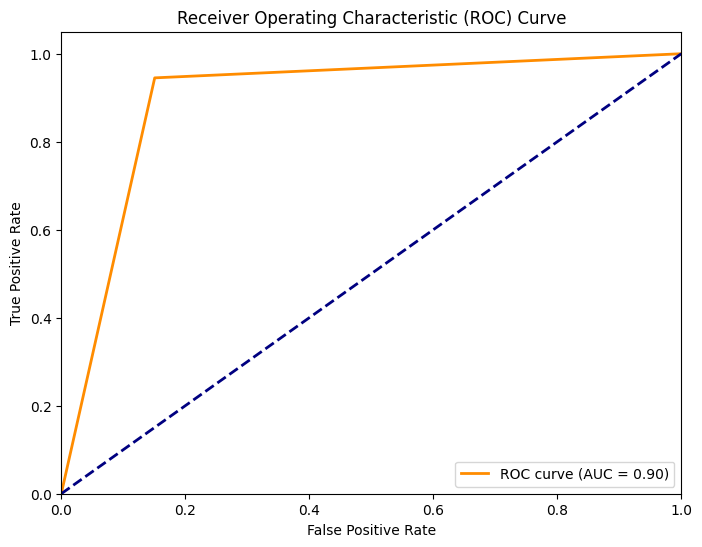

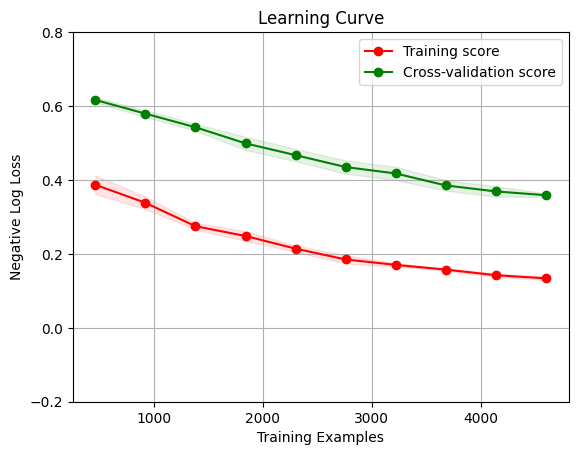

In [203]:
# Print the best parameter values
print("Best parameters:", MLP_SVM_optimized_grid_search.best_estimator_)

# Print the results
print("MLP_SVM_Accuracy:", MLP_SVM_optimized_accuracy)
print("MLP_SVM_Precision:", MLP_SVM_optimized_precision)
print("MLP_SVM_Recall:", MLP_SVM_optimized_recall)
print("MLP_SVM_F1 score:", MLP_SVM_optimized_f1)
print("MLP_SVM_AUC:", MLP_SVM_optimized_auc)


## LOG LOSS
MLP_SVM_optimized_y_pred_prob = MLP_SVM_optimized_best_model.predict_proba(X_test)
MLP_SVM_optimized_log_loss = log_loss(y_test, MLP_SVM_optimized_y_pred_prob)
print("MLP_SVM_Log Loss:", MLP_SVM_optimized_log_loss)


## CONFUSION MATRIX
# Use the best model to make predictions on the test set
MLP_SVM_optimized_y_pred = MLP_SVM_optimized_best_model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, MLP_SVM_optimized_y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


## CLASSIFICATION REPORT
# Use the best model to make predictions on the test set
MLP_SVM_optimized_y_pred = MLP_SVM_optimized_best_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, MLP_SVM_optimized_y_pred))


## ROC GRAPH
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, MLP_SVM_optimized_y_pred)
# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=MLP_SVM_optimized_best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

train_log_loss_mean = -np.mean(train_scores, axis=1)
train_log_loss_std = np.std(train_scores, axis=1)
test_log_loss_mean = -np.mean(test_scores, axis=1)
test_log_loss_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Negative Log Loss')
plt.ylim(-0.2, 0.8)
plt.grid()
plt.fill_between(train_sizes, train_log_loss_mean - train_log_loss_std,
                 train_log_loss_mean + train_log_loss_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_log_loss_mean - test_log_loss_std,
                 test_log_loss_mean + test_log_loss_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_log_loss_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_log_loss_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#### Tuned Hybrid Model 5: MLP Classifier & Logistic Regression

In [204]:
# Create the base models
mlp = MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate='adaptive', solver='lbfgs')
lr = LogisticRegression(C=0.01, penalty='l2', solver='saga')

# Create the stacking model
MLP_LR_estimators = [('mlp', mlp), ('lr', lr)]
MLP_LR_stacking_model = StackingClassifier(estimators=MLP_LR_estimators, final_estimator=LogisticRegression())

# Define the hyperparameters to tune
param_grid = {
    'final_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'final_estimator__C': [0.1, 1, 10],
}

# Use GridSearchCV to find the best hyperparameters for the final estimator
MLP_LR_optimized_grid_search = GridSearchCV(MLP_LR_stacking_model, param_grid=param_grid, cv=5)
MLP_LR_optimized_grid_search.fit(X_train, y_train)

# Get the best model
MLP_LR_optimized_best_model = MLP_LR_optimized_grid_search.best_estimator_

# Use the best model to make predictions on the test set
MLP_LR_optimized_y_pred = MLP_LR_optimized_best_model.predict(X_test)

# Calculate evaluation metrics
MLP_LR_optimized_accuracy = accuracy_score(y_test, MLP_LR_optimized_y_pred)
MLP_LR_optimized_precision = precision_score(y_test, MLP_LR_optimized_y_pred)
MLP_LR_optimized_recall = recall_score(y_test, MLP_LR_optimized_y_pred)
MLP_LR_optimized_f1 = f1_score(y_test, MLP_LR_optimized_y_pred)
MLP_LR_optimized_auc = roc_auc_score(y_test, MLP_LR_optimized_y_pred)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptr

Best parameters: StackingClassifier(estimators=[('mlp',
                                MLPClassifier(activation='tanh', alpha=0.1,
                                              hidden_layer_sizes=(100, 100),
                                              learning_rate='adaptive',
                                              solver='lbfgs')),
                               ('lr',
                                LogisticRegression(C=0.01, solver='saga'))],
                   final_estimator=LogisticRegression(C=0.1))
MLP_LR_Accuracy: 0.9103544127866574
MLP_LR_Precision: 0.8836317135549873
MLP_LR_Recall: 0.9478737997256516
MLP_LR_F1 score: 0.9146260754467241
MLP_LR_AUC: 0.9098523928205722
MLP_LR_Log Loss: 0.2797068323492727
Confusion Matrix:
[[619  91]
 [ 38 691]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       710
           1       0.88      0.95      0.91       729

    accuracy                           0.91      1439
   macro 

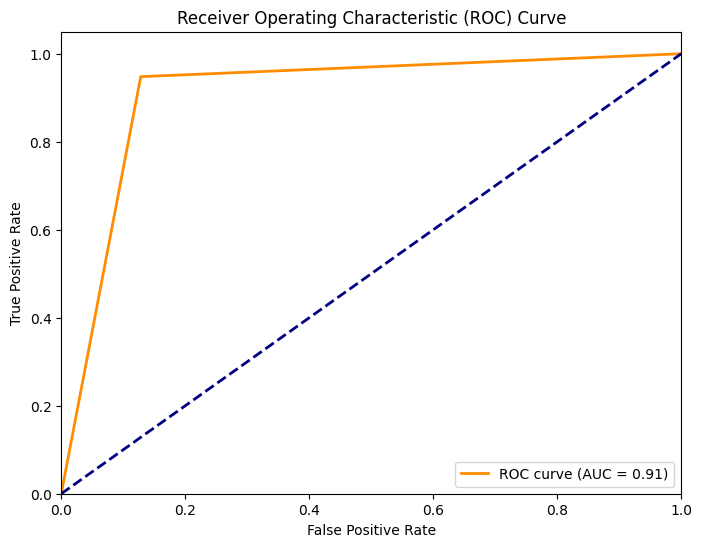

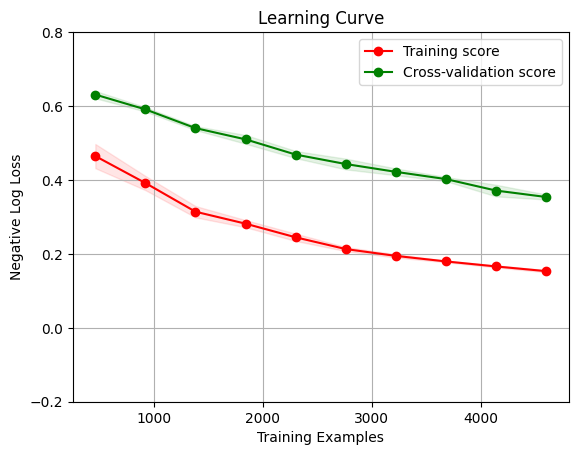

In [205]:
# Print the best parameter values
print("Best parameters:", MLP_LR_optimized_grid_search.best_estimator_)

# Print the results
print("MLP_LR_Accuracy:", MLP_LR_optimized_accuracy)
print("MLP_LR_Precision:", MLP_LR_optimized_precision)
print("MLP_LR_Recall:", MLP_LR_optimized_recall)
print("MLP_LR_F1 score:", MLP_LR_optimized_f1)
print("MLP_LR_AUC:", MLP_LR_optimized_auc)


## LOG LOSS
MLP_LR_optimized_y_pred_prob = MLP_LR_optimized_best_model.predict_proba(X_test)
MLP_LR_optimized_log_loss = log_loss(y_test, MLP_LR_optimized_y_pred_prob)
print("MLP_LR_Log Loss:", MLP_LR_optimized_log_loss)


## CONFUSION MATRIX
# Use the best model to make predictions on the test set
MLP_LR_optimized_y_pred = MLP_LR_optimized_best_model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, MLP_LR_optimized_y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


## CLASSIFICATION REPORT
# Use the best model to make predictions on the test set
MLP_LR_optimized_y_pred = MLP_LR_optimized_best_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, MLP_LR_optimized_y_pred))


## ROC GRAPH
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, MLP_LR_optimized_y_pred)
# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=MLP_LR_optimized_best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

train_log_loss_mean = -np.mean(train_scores, axis=1)
train_log_loss_std = np.std(train_scores, axis=1)
test_log_loss_mean = -np.mean(test_scores, axis=1)
test_log_loss_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Negative Log Loss')
plt.ylim(-0.2, 0.8)
plt.grid()
plt.fill_between(train_sizes, train_log_loss_mean - train_log_loss_std,
                 train_log_loss_mean + train_log_loss_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_log_loss_mean - test_log_loss_std,
                 test_log_loss_mean + test_log_loss_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_log_loss_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_log_loss_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#### Tuned Hybrid Model 6: Support Vector Machines & Logistic Regression

In [206]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Create the base models
svm = SVC(C=100, kernel='rbf')
lr = LogisticRegression(C=0.01, penalty='l2', solver='saga')

# Create the stacking model
SVM_LR_estimators = [('svm', svm), ('lr', lr)]
SVM_LR_stacking_model = StackingClassifier(estimators=SVM_LR_estimators, final_estimator=LogisticRegression())

# Define the hyperparameters to tune
param_grid = {
    'final_estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'final_estimator__C': [0.1, 1, 10],
}

# Use GridSearchCV to find the best hyperparameters for the final estimator
SVM_LR_optimized_grid_search = GridSearchCV(SVM_LR_stacking_model, param_grid=param_grid, cv=5)
SVM_LR_optimized_grid_search.fit(X_train, y_train)

# Get the best model
SVM_LR_optimized_best_model = SVM_LR_optimized_grid_search.best_estimator_

# Use the best model to make predictions on the test set
SVM_LR_optimized_y_pred = SVM_LR_optimized_best_model.predict(X_test)

# Calculate evaluation metrics
SVM_LR_optimized_accuracy = accuracy_score(y_test, SVM_LR_optimized_y_pred)
SVM_LR_optimized_precision = precision_score(y_test, SVM_LR_optimized_y_pred)
SVM_LR_optimized_recall = recall_score(y_test, SVM_LR_optimized_y_pred)
SVM_LR_optimized_f1 = f1_score(y_test, SVM_LR_optimized_y_pred)
SVM_LR_optimized_auc = roc_auc_score(y_test, SVM_LR_optimized_y_pred)

# Print the best parameter values
print("Best parameters:", SVM_LR_optimized_grid_search.best_estimator_)

c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jorda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_stacking.py", line 660, in fit
    return super().fit(X, y_encoded, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users

Best parameters: StackingClassifier(estimators=[('svm', SVC(C=100)),
                               ('lr',
                                LogisticRegression(C=0.01, solver='saga'))],
                   final_estimator=LogisticRegression(C=1))


SVM_LR_Accuracy: 0.8742182070882557
SVM_LR_Precision: 0.8416458852867831
SVM_LR_Recall: 0.9259259259259259
SVM_LR_F1 score: 0.8817766165904638
SVM_LR_AUC: 0.8735263432446532
SVM_LR_Log Loss: 0.3494127325115643
Confusion Matrix:
[[583 127]
 [ 54 675]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       710
           1       0.84      0.93      0.88       729

    accuracy                           0.87      1439
   macro avg       0.88      0.87      0.87      1439
weighted avg       0.88      0.87      0.87      1439



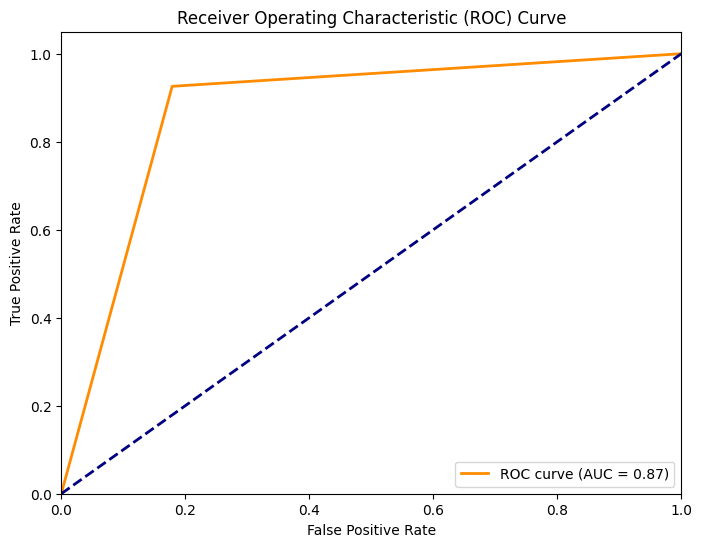

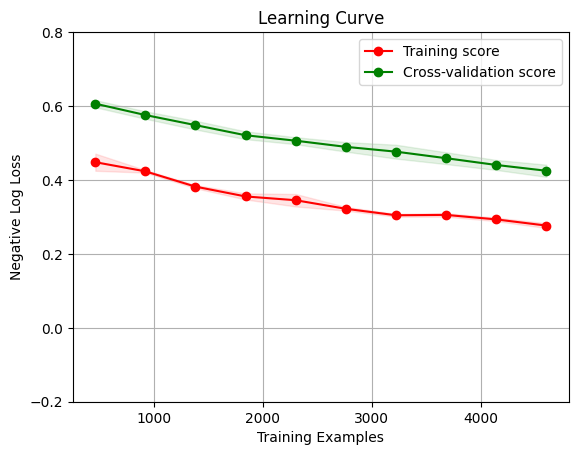

In [207]:
# Print the results
print("SVM_LR_Accuracy:", SVM_LR_optimized_accuracy)
print("SVM_LR_Precision:", SVM_LR_optimized_precision)
print("SVM_LR_Recall:", SVM_LR_optimized_recall)
print("SVM_LR_F1 score:", SVM_LR_optimized_f1)
print("SVM_LR_AUC:", SVM_LR_optimized_auc)



## LOG LOSS
SVM_LR_optimized_y_pred_prob = SVM_LR_optimized_best_model.predict_proba(X_test)
SVM_LR_optimized_log_loss = log_loss(y_test, SVM_LR_optimized_y_pred_prob)
print("SVM_LR_Log Loss:", SVM_LR_optimized_log_loss)


## CONFUSION MATRIX
# Use the best model to make predictions on the test set
SVM_LR_optimized_y_pred = SVM_LR_optimized_best_model.predict(X_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, SVM_LR_optimized_y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


## CLASSIFICATION REPORT
# Use the best model to make predictions on the test set
SVM_LR_optimized_y_pred = SVM_LR_optimized_best_model.predict(X_test)
# Print the classification report
print(classification_report(y_test, SVM_LR_optimized_y_pred))


## ROC GRAPH
# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, SVM_LR_optimized_y_pred)
# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=SVM_LR_optimized_best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_log_loss',
    n_jobs=-1
)

train_log_loss_mean = -np.mean(train_scores, axis=1)
train_log_loss_std = np.std(train_scores, axis=1)
test_log_loss_mean = -np.mean(test_scores, axis=1)
test_log_loss_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Negative Log Loss')
plt.ylim(-0.2, 0.8)
plt.grid()
plt.fill_between(train_sizes, train_log_loss_mean - train_log_loss_std,
                 train_log_loss_mean + train_log_loss_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_log_loss_mean - test_log_loss_std,
                 test_log_loss_mean + test_log_loss_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_log_loss_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_log_loss_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()

#### Optimised Hybrid Model Comparison embedded with best parameter from base model

In [236]:
# create a dictionary of evaluation metrics and confusion matrix for each model
results_dict = {
    "RFC_MLP_optimized": [RFC_MLP_optimized_accuracy, RFC_MLP_optimized_precision, RFC_MLP_optimized_recall, RFC_MLP_optimized_f1, RFC_MLP_optimized_auc, confusion_matrix(y_test, RFC_MLP_optimized_y_pred)],
    "RFC_SVM_optimized": [RFC_SVM_optimized_accuracy, RFC_SVM_optimized_precision, RFC_SVM_optimized_recall, RFC_SVM_optimized_f1, RFC_SVM_optimized_auc, confusion_matrix(y_test, RFC_SVM_optimized_y_pred)],
    "RFC_LR_optimized": [RFC_LR_optimized_accuracy, RFC_LR_optimized_precision, RFC_LR_optimized_recall, RFC_LR_optimized_f1, RFC_LR_optimized_auc, confusion_matrix(y_test, RFC_LR_optimized_y_pred)],
    "MLP_SVM_optimized": [MLP_SVM_optimized_accuracy, MLP_SVM_optimized_precision, MLP_SVM_optimized_recall, MLP_SVM_optimized_f1, MLP_SVM_optimized_auc, confusion_matrix(y_test, MLP_SVM_optimized_y_pred)],
    "MLP_LR_optimized": [MLP_LR_optimized_accuracy, MLP_LR_optimized_precision, MLP_LR_optimized_recall, MLP_LR_optimized_f1, MLP_LR_optimized_auc, confusion_matrix(y_test, MLP_LR_optimized_y_pred)],
    "SVM_LR_optimized": [SVM_LR_optimized_accuracy, SVM_LR_optimized_precision, SVM_LR_optimized_recall, SVM_LR_optimized_f1, SVM_LR_optimized_auc, confusion_matrix(y_test, SVM_LR_optimized_y_pred)]
}

# create a pandas dataframe from the results dictionary
final_results_df = pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "Recall", "F1 score", "AUC", "Confusion Matrix"])

# print the results dataframe
print(final_results_df)


                   Accuracy  Precision    Recall  F1 score       AUC  \
RFC_MLP_optimized  0.913829   0.907133  0.924554  0.915761  0.913686   
RFC_SVM_optimized  0.907575   0.907104  0.910837  0.908966  0.907531   
RFC_LR_optimized   0.915219   0.925666  0.905350  0.915395  0.915351   
MLP_SVM_optimized  0.897846   0.865578  0.945130  0.903607  0.897213   
MLP_LR_optimized   0.910354   0.883632  0.947874  0.914626  0.909852   
SVM_LR_optimized   0.874218   0.841646  0.925926  0.881777  0.873526   

                          Confusion Matrix  
RFC_MLP_optimized   [[641, 69], [55, 674]]  
RFC_SVM_optimized   [[642, 68], [65, 664]]  
RFC_LR_optimized    [[657, 53], [69, 660]]  
MLP_SVM_optimized  [[603, 107], [40, 689]]  
MLP_LR_optimized    [[619, 91], [38, 691]]  
SVM_LR_optimized   [[583, 127], [54, 675]]  


#### Bar graph comparison for accuracy

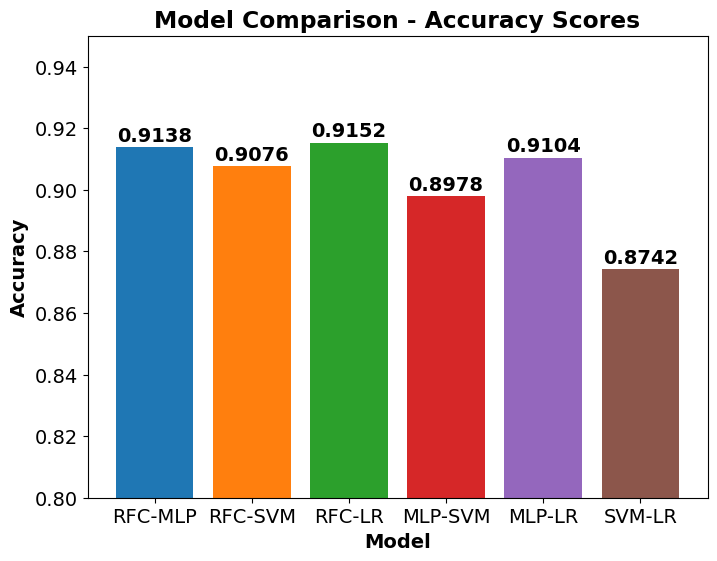

In [238]:
import matplotlib.pyplot as plt

### Define the model names and accuracy scores
model_names = ['RFC-MLP', 'RFC-SVM', 'RFC-LR', 'MLP-SVM', 'MLP-LR', 'SVM-LR']
accuracy_scores = [RFC_MLP_optimized_accuracy, RFC_SVM_optimized_accuracy, RFC_LR_optimized_accuracy, MLP_SVM_optimized_accuracy, MLP_LR_optimized_accuracy, SVM_LR_optimized_accuracy]

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})

# Create the bar chart
plt.bar(model_names, accuracy_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add a title and axis labels
plt.title('Model Comparison - Accuracy Scores', fontweight='bold')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

# Set the y-axis range
plt.ylim(0.8, 0.95)

# Add value labels on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.002, str(round(v, 4)), ha='center', fontweight='bold')

# Show the plot
plt.show()

#### Bar graph comparison for Precision

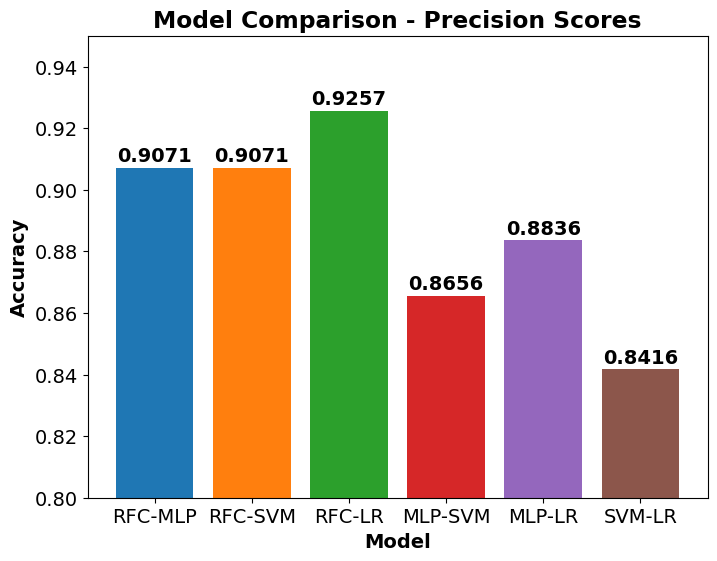

In [239]:
import matplotlib.pyplot as plt

### Define the model names and accuracy scores
model_names = ['RFC-MLP', 'RFC-SVM', 'RFC-LR', 'MLP-SVM', 'MLP-LR', 'SVM-LR']
precision_scores = [RFC_MLP_optimized_precision, RFC_SVM_optimized_precision, RFC_LR_optimized_precision, MLP_SVM_optimized_precision, MLP_LR_optimized_precision, SVM_LR_optimized_precision]

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})

# Create the bar chart
plt.bar(model_names, precision_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add a title and axis labels
plt.title('Model Comparison - Precision Scores', fontweight='bold')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

# Set the y-axis range
plt.ylim(0.8, 0.95)

# Add value labels on top of each bar
for i, v in enumerate(precision_scores):
    plt.text(i, v + 0.002, str(round(v, 4)), ha='center', fontweight='bold')

# Show the plot
plt.show()

#### Bar graph comparison for Recall

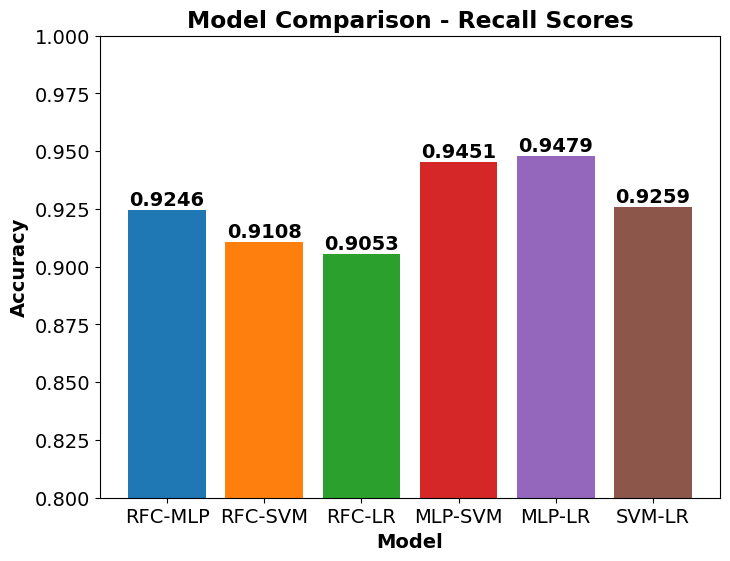

In [240]:
import matplotlib.pyplot as plt

### Define the model names and accuracy scores
model_names = ['RFC-MLP', 'RFC-SVM', 'RFC-LR', 'MLP-SVM', 'MLP-LR', 'SVM-LR']
recall_scores = [RFC_MLP_optimized_recall, RFC_SVM_optimized_recall, RFC_LR_optimized_recall, MLP_SVM_optimized_recall, MLP_LR_optimized_recall, SVM_LR_optimized_recall]

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})

# Create the bar chart
plt.bar(model_names, recall_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add a title and axis labels
plt.title('Model Comparison - Recall Scores', fontweight='bold')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

# Set the y-axis range
plt.ylim(0.8, 1.0)

# Add value labels on top of each bar
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.002, str(round(v, 4)), ha='center', fontweight='bold')

# Show the plot
plt.show()

#### Bar graph comparison for F1

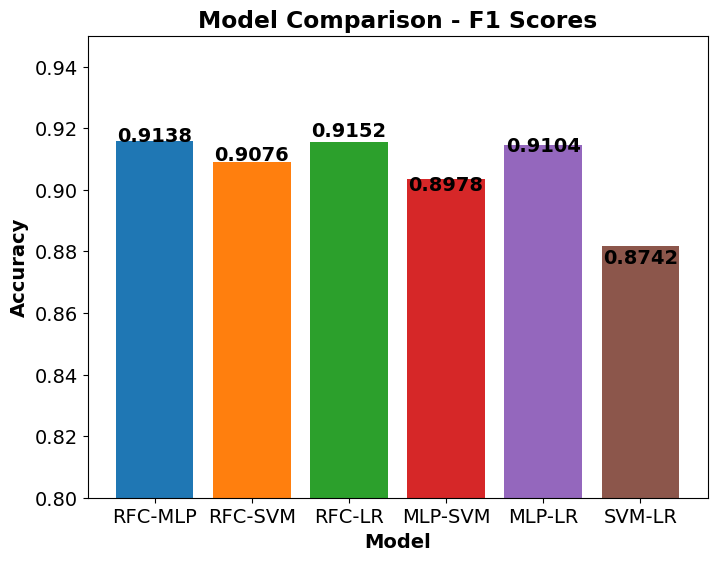

In [241]:
import matplotlib.pyplot as plt

### Define the model names and accuracy scores
model_names = ['RFC-MLP', 'RFC-SVM', 'RFC-LR', 'MLP-SVM', 'MLP-LR', 'SVM-LR']
f1_scores = [RFC_MLP_optimized_f1, RFC_SVM_optimized_f1, RFC_LR_optimized_f1, MLP_SVM_optimized_f1, MLP_LR_optimized_f1, SVM_LR_optimized_f1]

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})

# Create the bar chart
plt.bar(model_names, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add a title and axis labels
plt.title('Model Comparison - F1 Scores', fontweight='bold')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

# Set the y-axis range
plt.ylim(0.8, 0.95)

# Add value labels on top of each bar
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.002, str(round(v, 4)), ha='center', fontweight='bold')

# Show the plot
plt.show()

#### Bar graph comparison for AUC

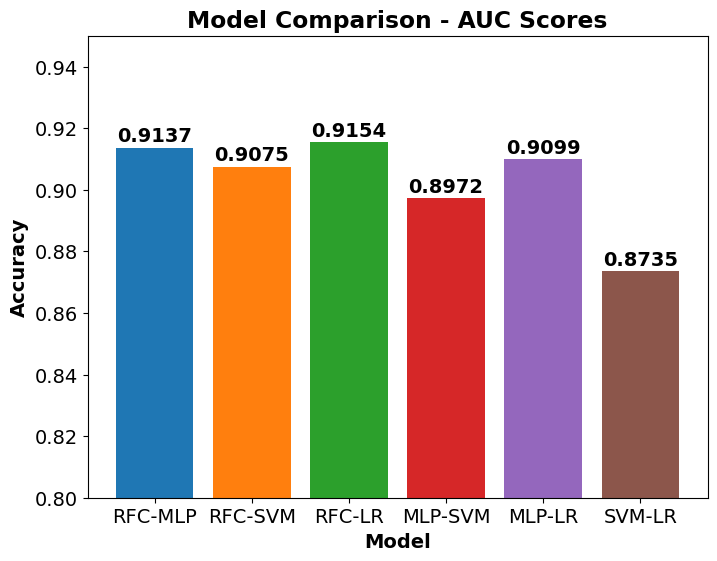

In [242]:
import matplotlib.pyplot as plt

### Define the model names and accuracy scores
model_names = ['RFC-MLP', 'RFC-SVM', 'RFC-LR', 'MLP-SVM', 'MLP-LR', 'SVM-LR']
auc_scores = [RFC_MLP_optimized_auc, RFC_SVM_optimized_auc, RFC_LR_optimized_auc, MLP_SVM_optimized_auc, MLP_LR_optimized_auc, SVM_LR_optimized_auc]

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})

# Create the bar chart
plt.bar(model_names, auc_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Add a title and axis labels
plt.title('Model Comparison - AUC Scores', fontweight='bold')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

# Set the y-axis range
plt.ylim(0.8, 0.95)

# Add value labels on top of each bar
for i, v in enumerate(auc_scores):
    plt.text(i, v + 0.002, str(round(v, 4)), ha='center', fontweight='bold')

# Show the plot
plt.show()

# Final result

In [237]:
# create a dictionary of evaluation metrics for each model
results_dict = {
    "RFC": [RFC_accuracy, RFC_precision, RFC_recall, RFC_f1, RFC_auc],
    "MLP": [MLP_accuracy, MLP_precision, MLP_recall, MLP_f1, MLP_auc],
    "SVM": [SVM_accuracy, SVM_precision, SVM_recall, SVM_f1, SVM_auc],
    "LR": [LR_accuracy, LR_accuracy, LR_recall, LR_f1, LR_auc], 

    "RFC_Optimized": [RFC_optimized_accuracy, RFC_optimized_precision, RFC_optimized_recall, RFC_optimized_f1, RFC_optimized_auc],
    "MLP_Optimized": [MLP_accuracy_optimized, MLP_precision_optimized, MLP_recall_optimized, MLP_f1_optimized, MLP_auc_optimized],
    "SVM_Optimized": [SVM_accuracy_optimized, SVM_precision_optimized, SVM_recall_optimized, SVM_f1_optimized, SVM_auc_optimized],
    "LR_Optimized": [LR_optimized_accuracy, LR_optimized_precision, LR_optimized_recall, LR_optimized_f1, LR_optimized_auc],    

    "RFC_MLP": [RFC_MLP_accuracy, RFC_MLP_precision, RFC_MLP_recall, RFC_MLP_f1, RFC_MLP_auc],
    "RFC_LR": [RFC_LR_accuracy, RFC_LR_precision, RFC_LR_recall, RFC_LR_f1, RFC_LR_auc],
    "RFC_SVM": [RFC_SVM_accuracy, RFC_SVM_precision, RFC_SVM_recall, RFC_SVM_f1, RFC_SVM_auc],
    "MLP_LR": [MLP_LR_accuracy, MLP_LR_precision, MLP_LR_recall, MLP_LR_f1, MLP_LR_auc],
    "MLP_SVM": [MLP_SVM_accuracy, MLP_SVM_precision, MLP_SVM_recall, MLP_SVM_f1, MLP_SVM_auc],
    "SVM_LR": [SVM_LR_accuracy, SVM_LR_precision, SVM_LR_recall, SVM_LR_f1, SVM_LR_auc],

    "RFC_MLP_optimized": [RFC_MLP_optimized_accuracy, RFC_MLP_optimized_precision, RFC_MLP_optimized_recall, RFC_MLP_optimized_f1, RFC_MLP_optimized_auc],
    "RFC_SVM_optimized": [RFC_SVM_optimized_accuracy, RFC_SVM_optimized_precision, RFC_SVM_optimized_recall, RFC_SVM_optimized_f1, RFC_SVM_optimized_auc],
    "RFC_LR_optimized": [RFC_LR_optimized_accuracy, RFC_LR_optimized_precision, RFC_LR_optimized_recall, RFC_LR_optimized_f1, RFC_LR_optimized_auc],
    "MLP_SVM_optimized": [MLP_SVM_optimized_accuracy, MLP_SVM_optimized_precision, MLP_SVM_optimized_recall, MLP_SVM_optimized_f1, MLP_SVM_optimized_auc],
    "MLP_LR_optimized": [MLP_LR_optimized_accuracy, MLP_LR_optimized_precision, MLP_LR_optimized_recall, MLP_LR_optimized_f1, MLP_LR_optimized_auc],
    "SVM_LR_optimized": [SVM_LR_optimized_accuracy, SVM_LR_optimized_precision, SVM_LR_optimized_recall, SVM_LR_optimized_f1, SVM_LR_optimized_auc]
}

# create a pandas dataframe from the results dictionary
final_results_df = pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "Recall", "F1 score", "AUC"])

# print the results dataframe
print(final_results_df)


                   Accuracy  Precision    Recall  F1 score       AUC
RFC                0.898541   0.888149  0.914952  0.901351  0.898321
MLP                0.833218   0.820446  0.858711  0.839142  0.832876
SVM                0.731063   0.725000  0.755830  0.740094  0.730732
LR                 0.678944   0.678944  0.676269  0.680939  0.678980
RFC_Optimized      0.901320   0.890812  0.917695  0.904054  0.901101
MLP_Optimized      0.876998   0.836585  0.941015  0.885733  0.876141
SVM_Optimized      0.873523   0.830713  0.942387  0.883033  0.872602
LR_Optimized       0.674774   0.678035  0.681756  0.679891  0.674681
RFC_MLP            0.913134   0.908108  0.921811  0.914908  0.913018
RFC_LR             0.896456   0.895095  0.901235  0.898154  0.896392
RFC_SVM            0.909659   0.906377  0.916324  0.911323  0.909570
MLP_LR             0.877693   0.839264  0.938272  0.886010  0.876882
MLP_SVM            0.881862   0.866317  0.906722  0.886059  0.881530
SVM_LR             0.877693   0.84

# Import model

In [332]:
import joblib

# Define filename and path to save the model
path = 'C:/Users/jorda/OneDrive - Asia Pacific University/Desktop/FYP_Y3S2/code'

# Save the model using joblib
joblib.dump(RFC_MLP_optimized_best_model, 'RFC_MLP_optimized_best_model_v2.joblib')

['RFC_MLP_optimized_best_model_v2.joblib']

In [303]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Load the saved model
model_path = 'C:/Users/jorda/OneDrive - Asia Pacific University/Desktop/FYP_Y3S2/submission/TAN_CHOON_HOW_MR_TP061594_FYP_Source_Code_APD3F2209_CSDA/rfc.joblib'
rfcmodel = joblib.load(model_path)

In [328]:
# Collect user input for each feature
is_male = int(input('Is the patient male? (0 for no, 1 for yes) '))
age = int(input('Patient age (years): '))
education = int(input('Years of education: '))
is_smoker = int(input('Is the patient a smoker? (0 for no, 1 for yes) '))
cigs_per_day = int(input('Number of cigarettes per day: '))
is_on_bp_meds = int(input('Is the patient taking blood pressure medication? (0 for no, 1 for yes) '))
has_history_of_stroke = int(input('Has the patient had a stroke before? (0 for no, 1 for yes) '))
has_hypertension = int(input('Does the patient have hypertension? (0 for no, 1 for yes) '))
has_diabetes = int(input('Does the patient have diabetes? (0 for no, 1 for yes) '))
tot_chol = int(input('Total cholesterol (mg/dL): '))
systolic_bp = int(input('Systolic blood pressure (mmHg): '))
diastolic_bp = int(input('Diastolic blood pressure (mmHg): '))
bmi = float(input('Body mass index (kg/m^2): '))
heart_rate = int(input('Heart rate (beats per minute): '))
glucose = int(input('Glucose (mg/dL): '))

# Create a dictionary with the input data
input_dict = {
    'is_male': is_male,
    'age_yrs': age,
    'education_yrs': education,
    'is_smoker': is_smoker,
    'cigsPerDay': cigs_per_day,
    'is_on_bp_meds': is_on_bp_meds,
    'has_history_of_stroke': has_history_of_stroke,
    'has_hypertension': has_hypertension,
    'has_diabetes': has_diabetes,
    'tot_chol': tot_chol,
    'systolic_blood_pressure': systolic_bp,
    'diastolic_blood_pressure': diastolic_bp,
    'BMI': bmi,
    'heart_rate_bpm': heart_rate,
    'glucose': glucose
}

# Convert the dictionary to a pandas DataFrame
input_df = pd.DataFrame([input_dict])

# Create a DataFrame with the four possible education values as columns
education_values = pd.DataFrame({'education_yrs_1': [0], 'education_yrs_2': [0], 'education_yrs_3': [0], 'education_yrs_4': [0]})
# Set the education year column based on user input
if education == 1:
    education_values['education_yrs_1'] = 1
elif education == 2:
    education_values['education_yrs_2'] = 1
elif education == 3:
    education_values['education_yrs_3'] = 1
elif education == 4:
    education_values['education_yrs_4'] = 1
# Merge the input_df with the education_values DataFrame
input_df = pd.concat([input_df, education_values], axis=1)

# Drop the original education column
input_df = input_df.drop('education_yrs', axis=1)

# Scale continuous variables
continuous_vars = ['age_yrs', 'cigsPerDay', 'tot_chol', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'BMI', 'heart_rate_bpm', 'glucose']
scaler = StandardScaler()


,is_male,age_yrs,is_smoker,cigsPerDay,is_on_bp_meds,has_history_of_stroke,has_hypertension,has_diabetes,tot_chol,systolic_blood_pressure,diastolic_blood_pressure,BMI,heart_rate_bpm,glucose,education_yrs_1,education_yrs_2,education_yrs_3,education_yrs_4
0,1,33,1,1,1,1,1,1,1,1,1,1.0,1,1,0,0,1,0


In [329]:
# Use the loaded model to make a prediction
prediction = rfcmodel.predict(input_df)

# Print the prediction
print('The predicted stroke risk for this patient is:', prediction[0])

# Print the prediction result
if prediction[0] == 1:
    print("You have a high chance of having heart disease.")
else:
    print("You have a low chance of having heart disease.")

The predicted stroke risk for this patient is: 1
You have a high chance of having heart disease.
